# Veri Analizi Final Ödevi

### Black Friday Sale Veri Seti Kullanılarak Veri Analizi

19010011014
Selin YİĞİT

# Araştırma sorularına ve sonuçlarına genel bakış:

   1. En çok tercih edilen ürün nedir?
   
      Cevap: %21.8 oran ileP00025442 ID'sine sahip ürün en çok tercih edilen üründür.
      <br>
   2. En çok satılan ürünü alan müşteri yaş aralığı nedir?
   
      Cevap: 2.00 oran ile 26-35 yaş aralığı en çok ürün alımı yapan yaş aralığıdır.
      <br>
   3. En az ürünü alan müşteri cinsiyeti nedir?
   
      Cevap: %23.3 oran ile Female yani kadın cinsiyetine sahip müşteriler en az ürün alımına sahiptir.

# Motivasyon ve arka plan :

# Veri kümesi ile ilgili bilgiler: Black Friday Sales

"ABC Private Limited" adlı parekende şirketi, farklı kategorilerdeki çeşitli ürünlere karşı müşteri satın alma davranışını anlamak için seçilen yüksek hacimli ürünler göz önüne alınarak çeşitli müşterilerin satın alma özetlerini paylaşmıştır. 

Black Friday Sales veri seti 550068 satır ve 12 sütundan oluşmaktadır. Bu sütunlar sırası ile:

1. User_ID, 
2. Product_ID, 
3. Gender, 
4. Age, 
5. Occupation, 
6. City_Category, 
7. Stay_In_Current_City_Years, 
8. Marital_Status, 
9. Product_Category_1, 
10. Product_Category_2, 
11. Product_Category_3, 
12. Purchase

3, 4, 5, 6, 7, 8, 9, 10 ve 11 no'lu sütunlar kategorik verilerden oluşmaktadır.

https://www.kaggle.com/datasets/rajeshrampure/black-friday-sale?resource=download

# Metodoloji:

# Veri Analizi: KOD

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import math
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

In [183]:
# Veri Setinin Alınması

bfs_data = pd.read_csv("C:/Users/Selin/Desktop/Ders Dokumanlari/4.Sınıf Dersleri/Bahar Dönemi/Veri Analizi/VA_19_014/train.csv")

## Veri Hakkında Bilgi Edinme Ve Görselleştirme

In [184]:
# Veri Setinin Satır-Sütun Bilgisi
bfs_data.shape

(550068, 12)

In [185]:
# Veri Setinin İlk 5 Satır:
bfs_data.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [186]:
# Veri İle ilgili bilgilerin alınması
bfs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [187]:
# Veri türü Object olan sütunlar formatlandı.
frmt_obj = EngFormatter()

In [82]:
bfs_data.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [83]:
# Kategorik sütunların belirlenmesi
categorical_columns = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']

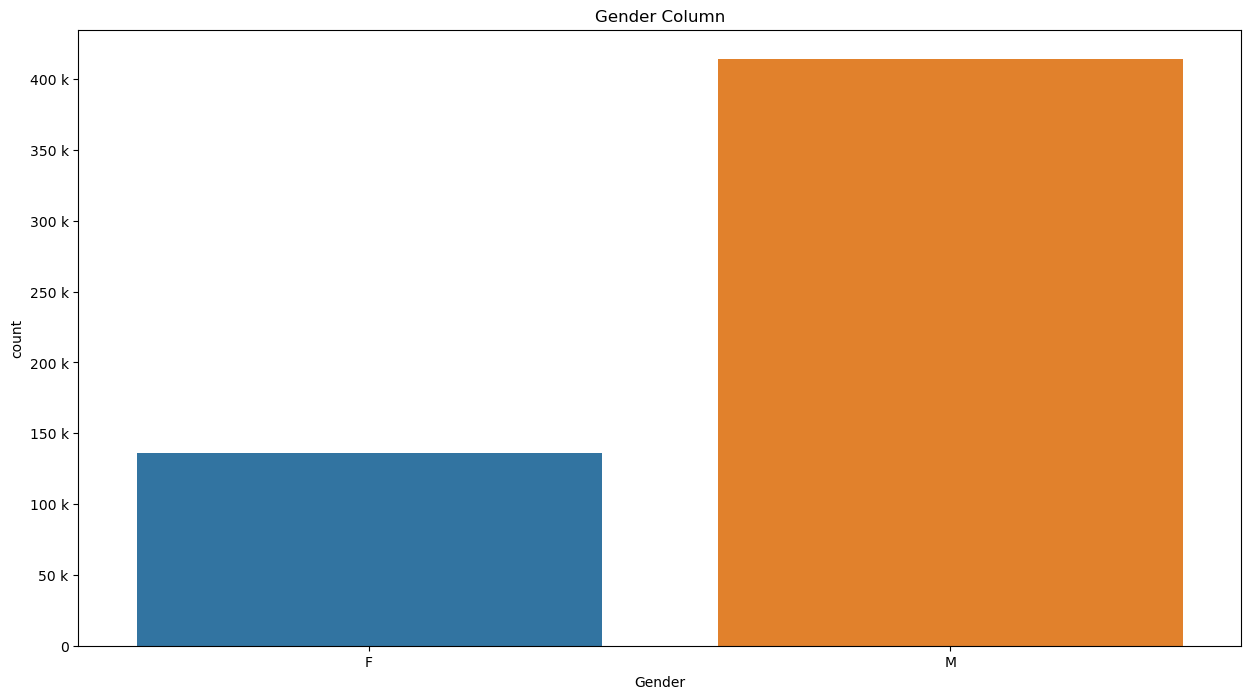

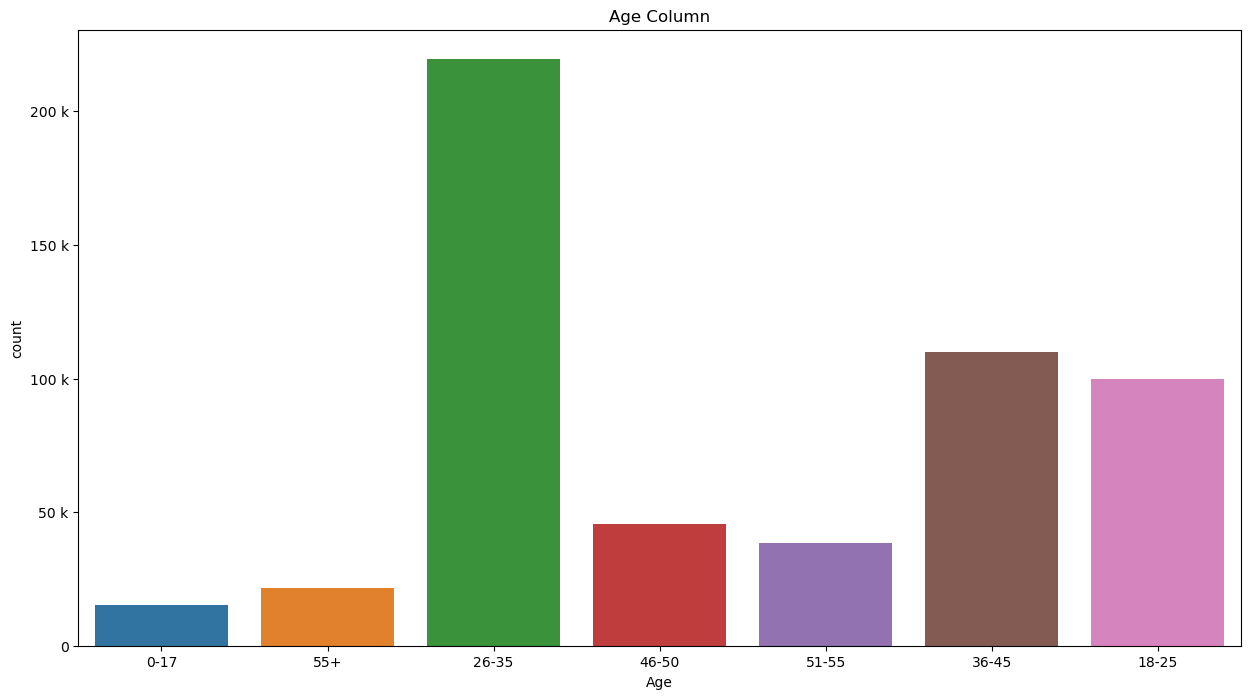

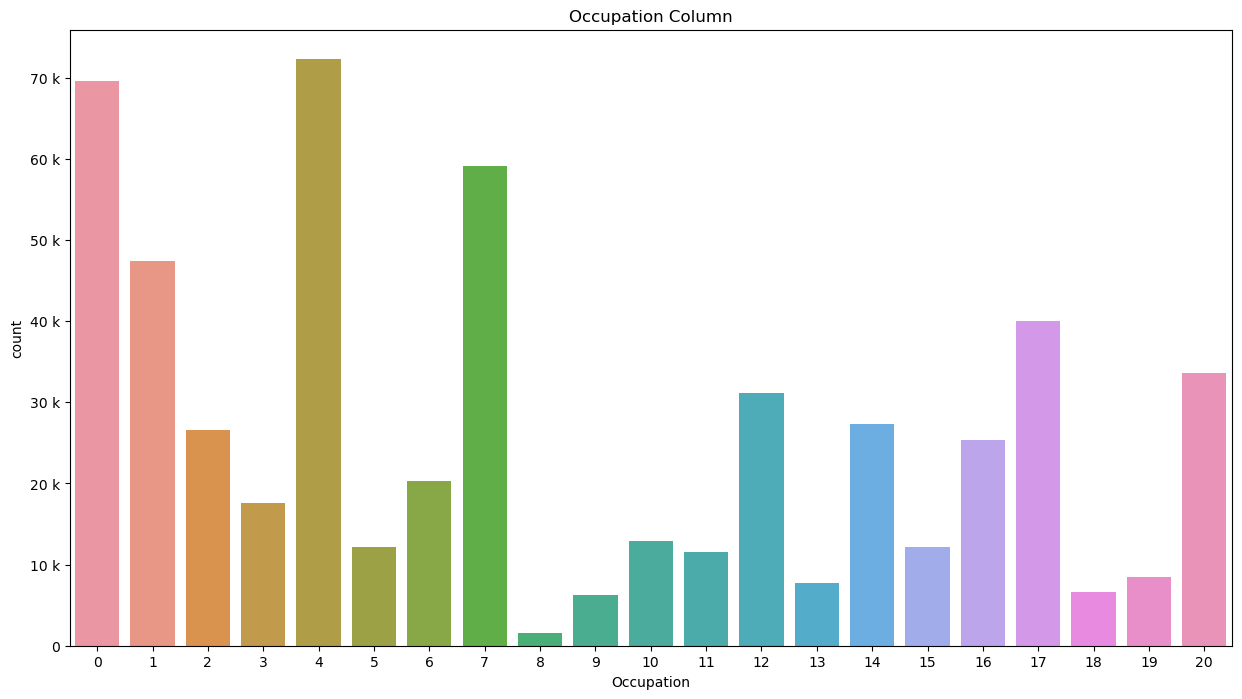

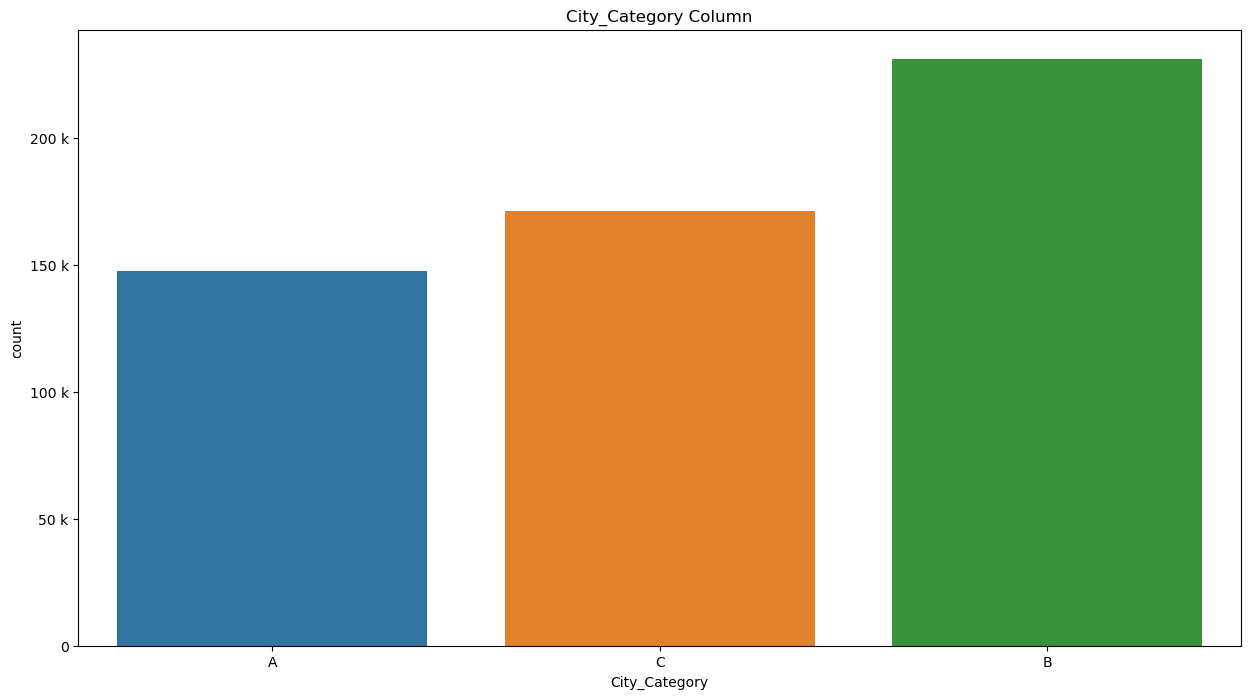

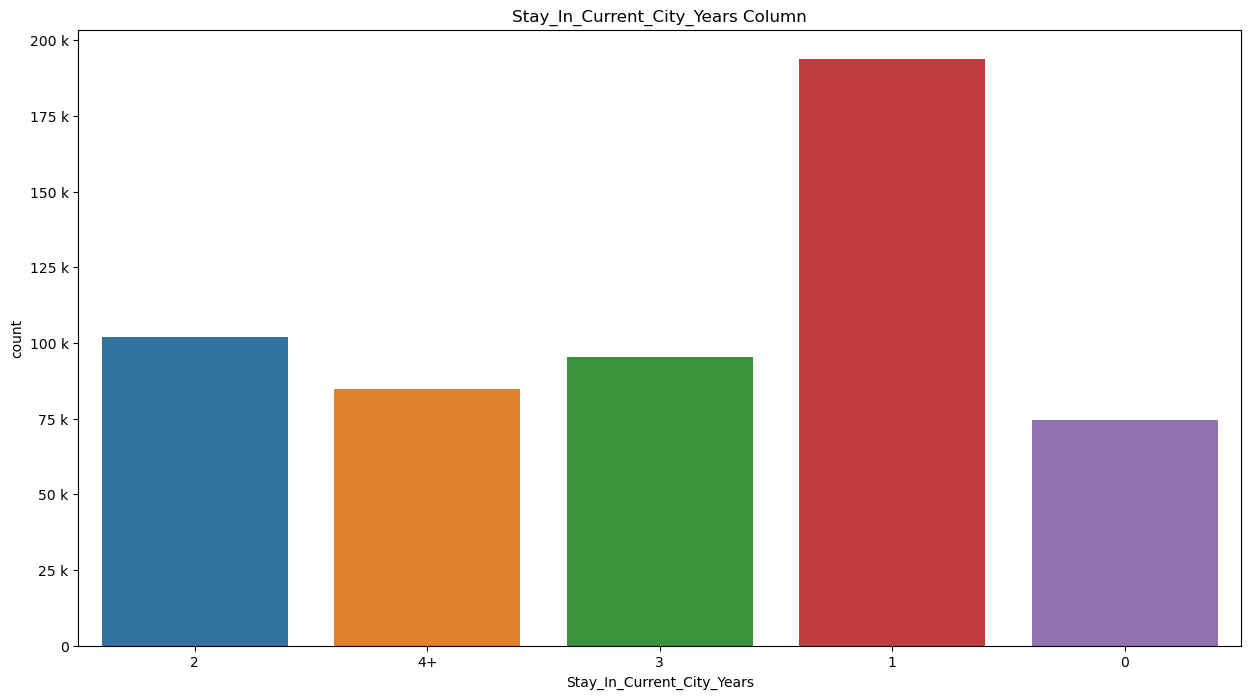

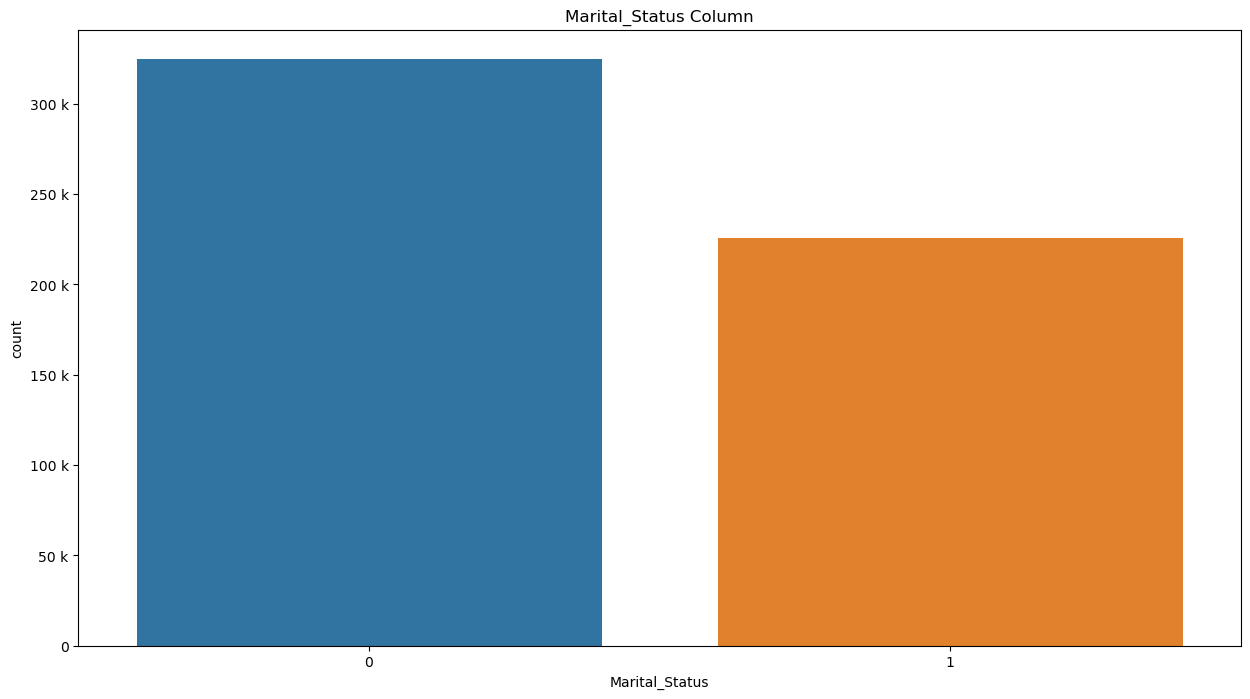

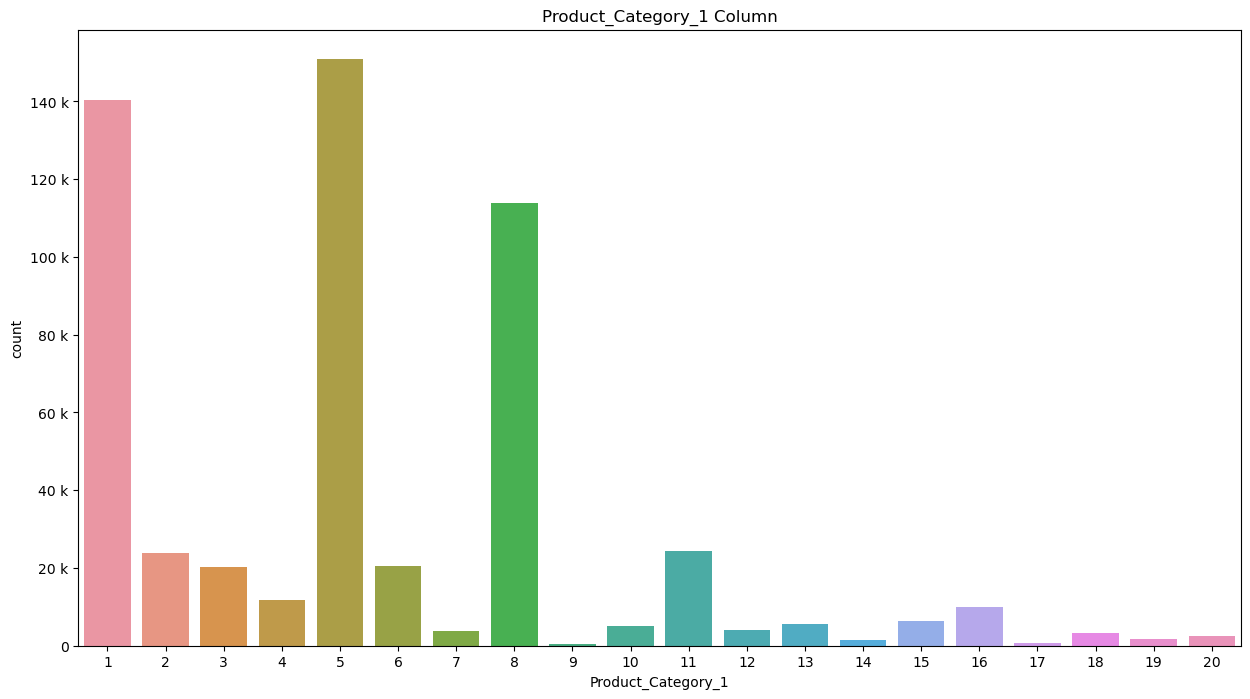

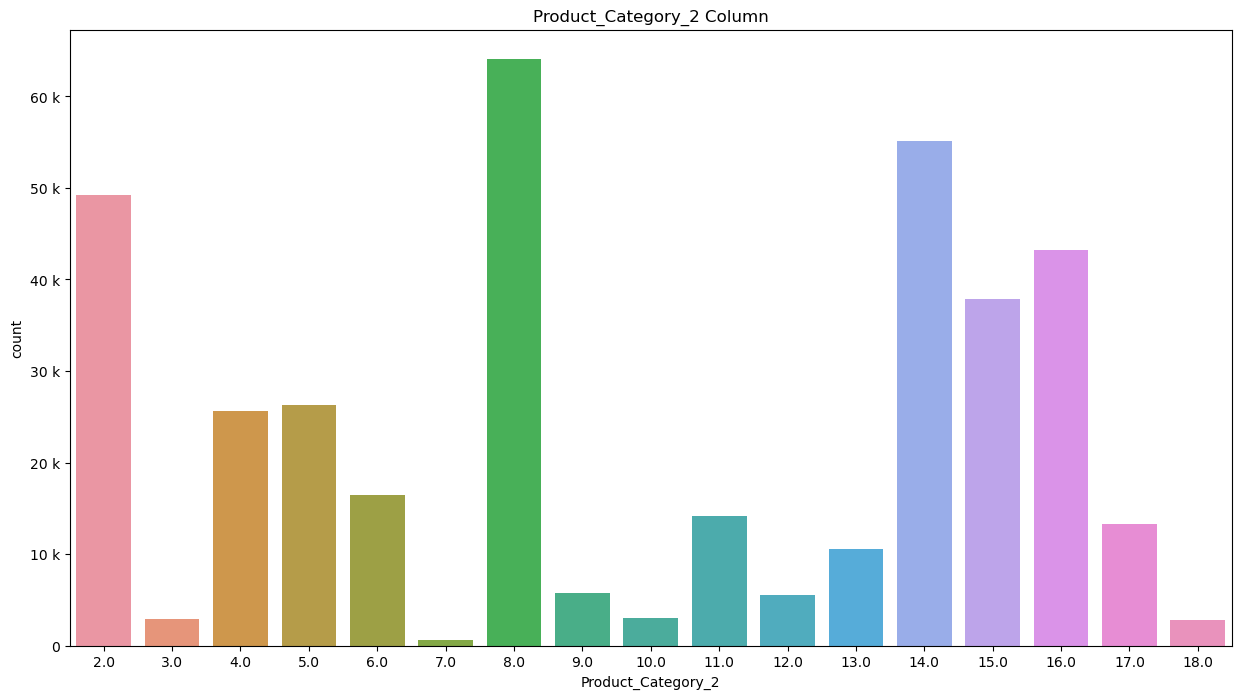

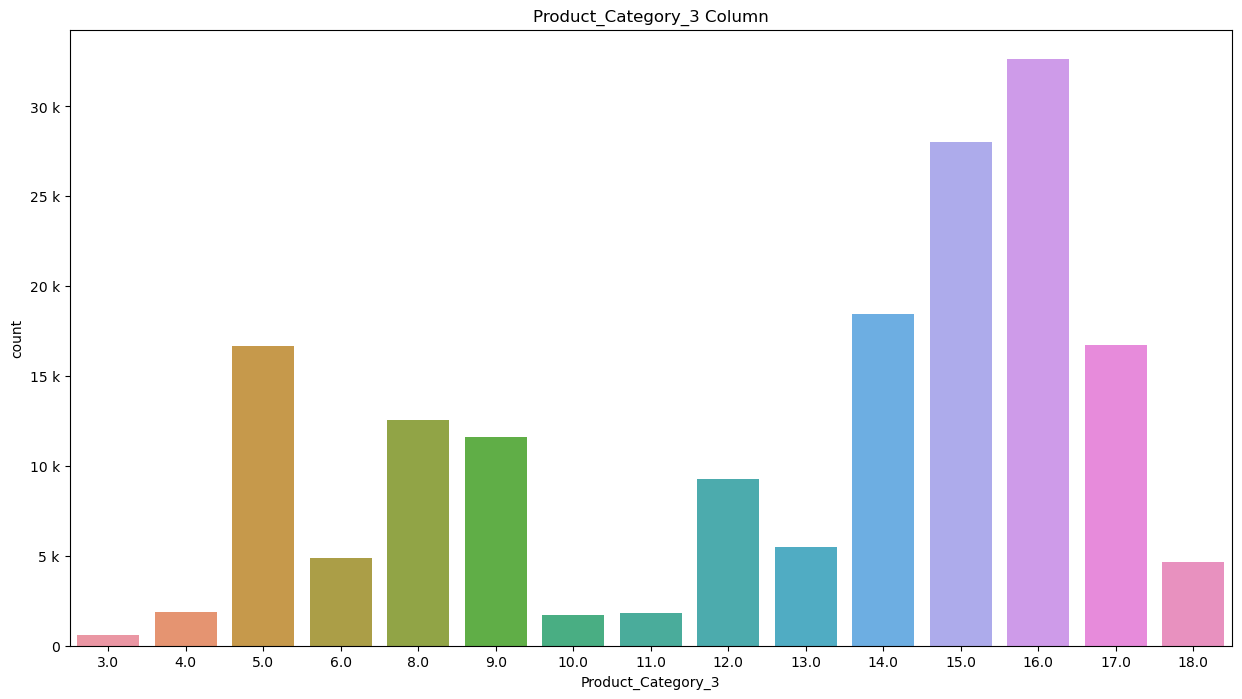

In [84]:
# Kategorik sütunların görselleştirilmesi(Tek Değişkenli Analiz)
for categorical in categorical_columns:
    fig, ax = plt.subplots(figsize = (15,8))
    sns.countplot(data=bfs_data, x=categorical, ax=ax).set(title=f"{categorical} Column")
    ax.yaxis.set_major_formatter(frmt_obj)

<AxesSubplot:>

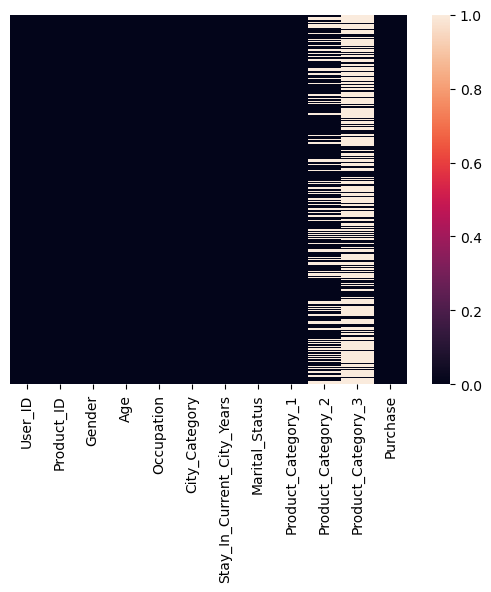

In [85]:
# Veri setindeki eksik verilerin görselleştirilmesi - Product_Category_2 VE Product_Category_3
sns.heatmap(bfs_data.isnull(), yticklabels = False, cbar = True)

In [86]:
# Sütunlardaki toplam eksik veri sayısı
bfs_data.isnull().sum().reset_index()

index       0
0                      User_ID       0
1                   Product_ID       0
2                       Gender       0
3                          Age       0
4                   Occupation       0
5                City_Category       0
6   Stay_In_Current_City_Years       0
7               Marital_Status       0
8           Product_Category_1       0
9           Product_Category_2  173638
10          Product_Category_3  383247
11                    Purchase       0

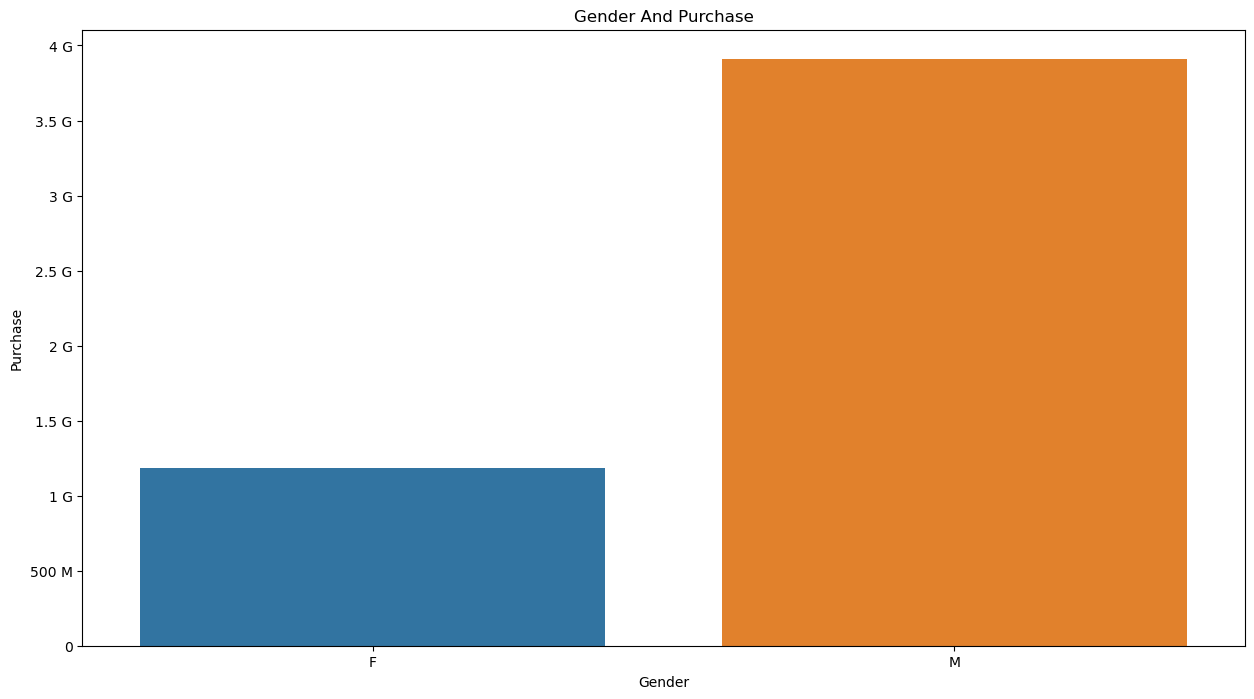

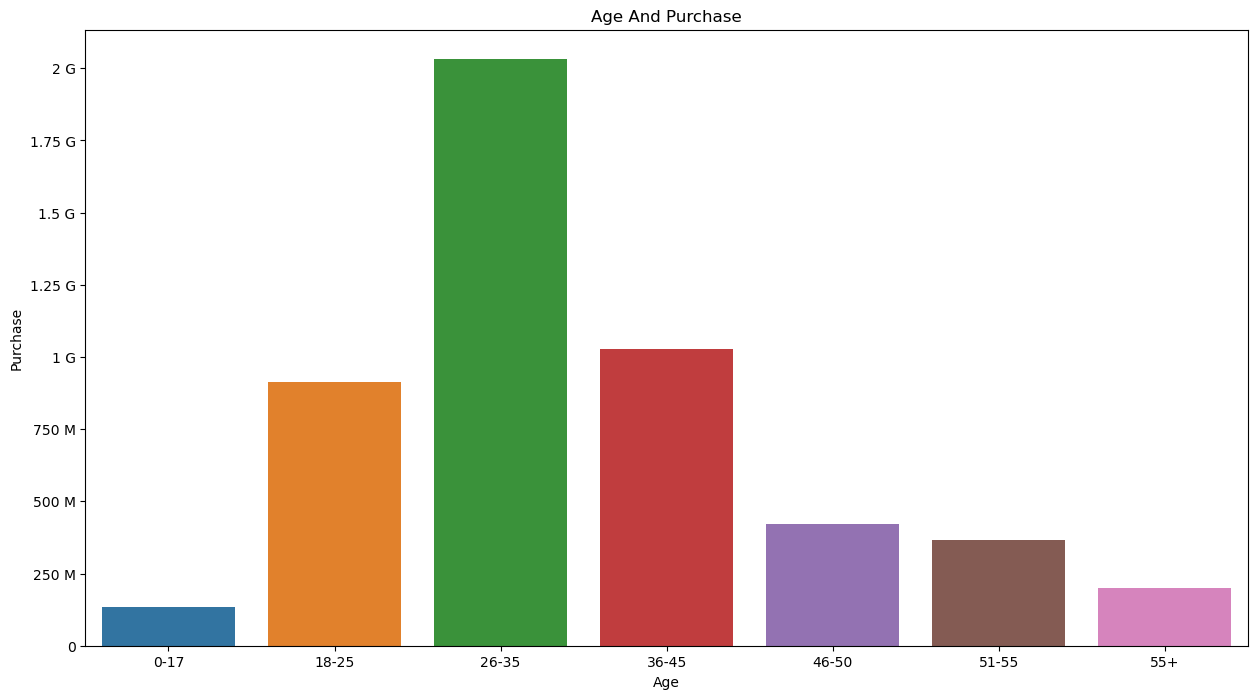

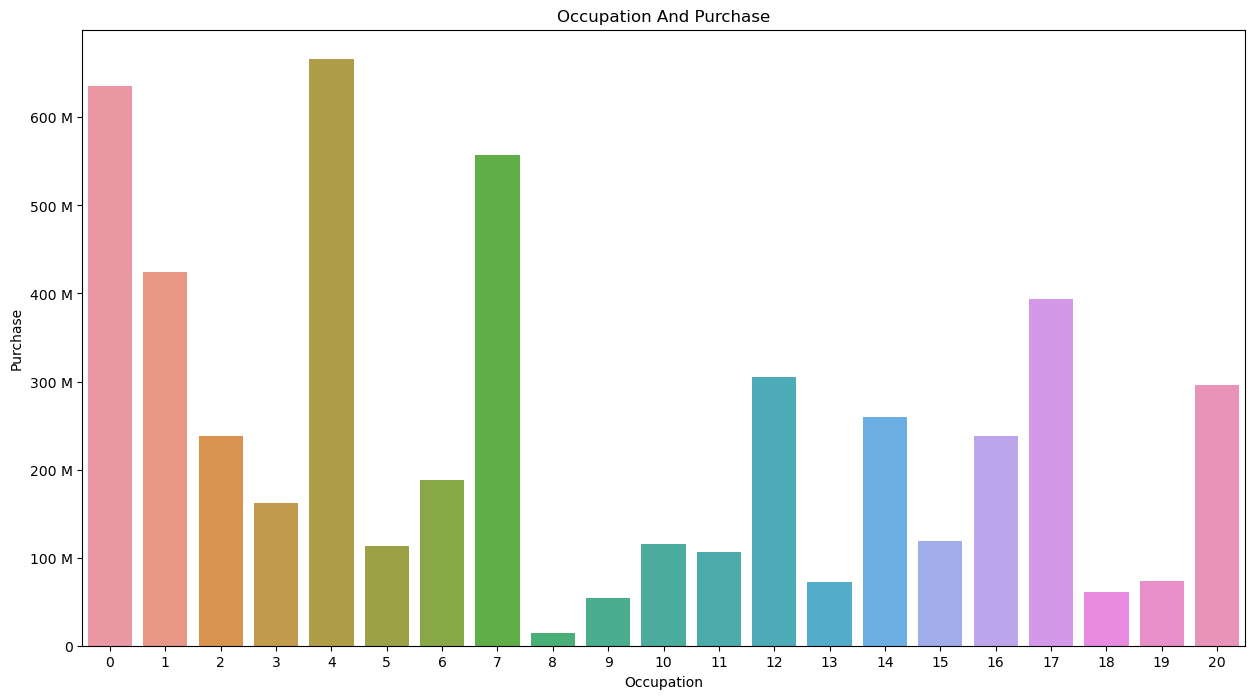

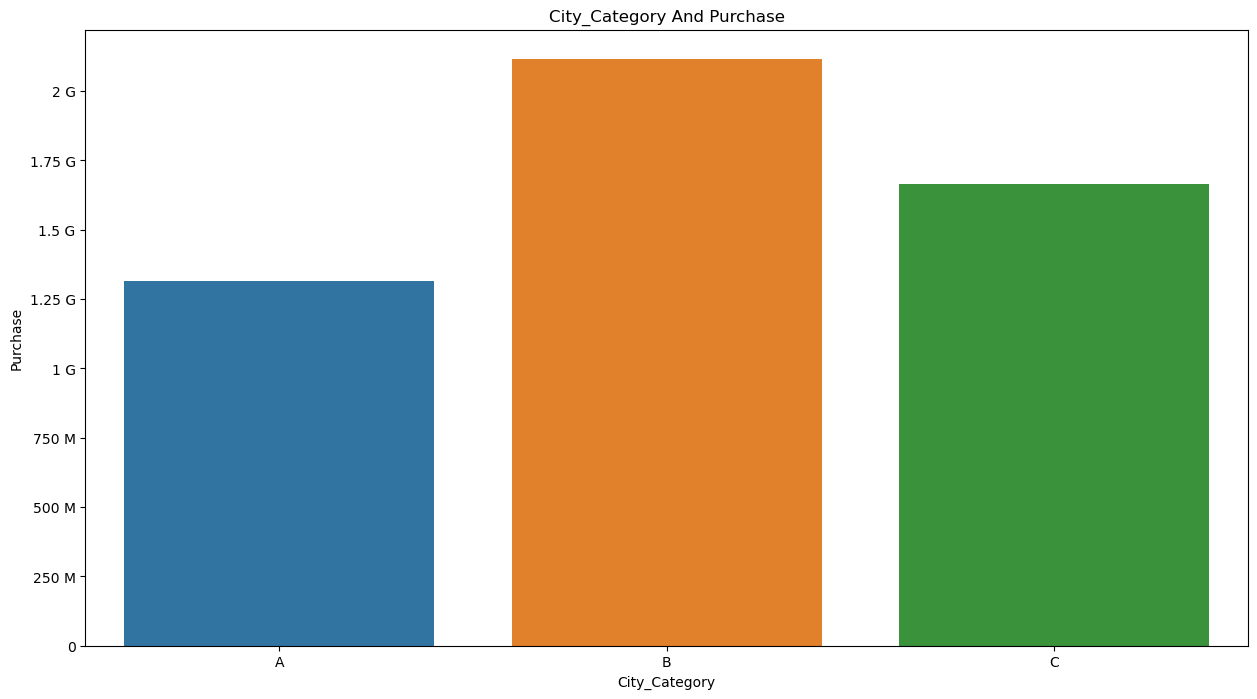

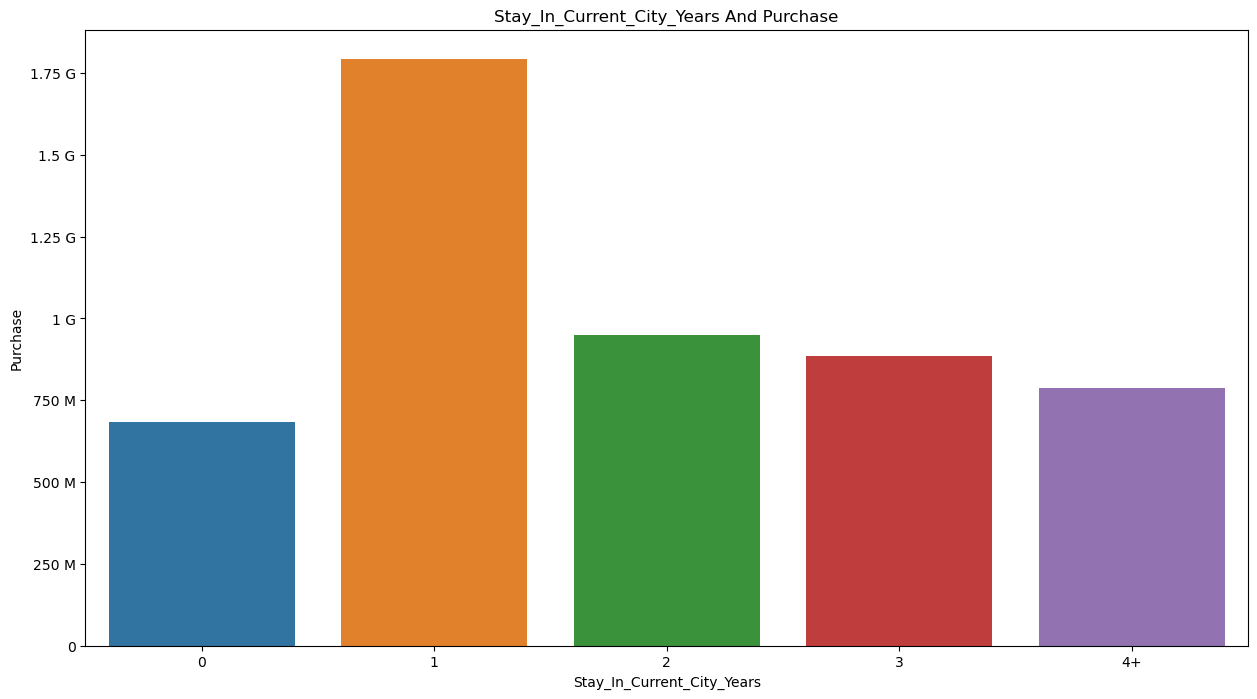

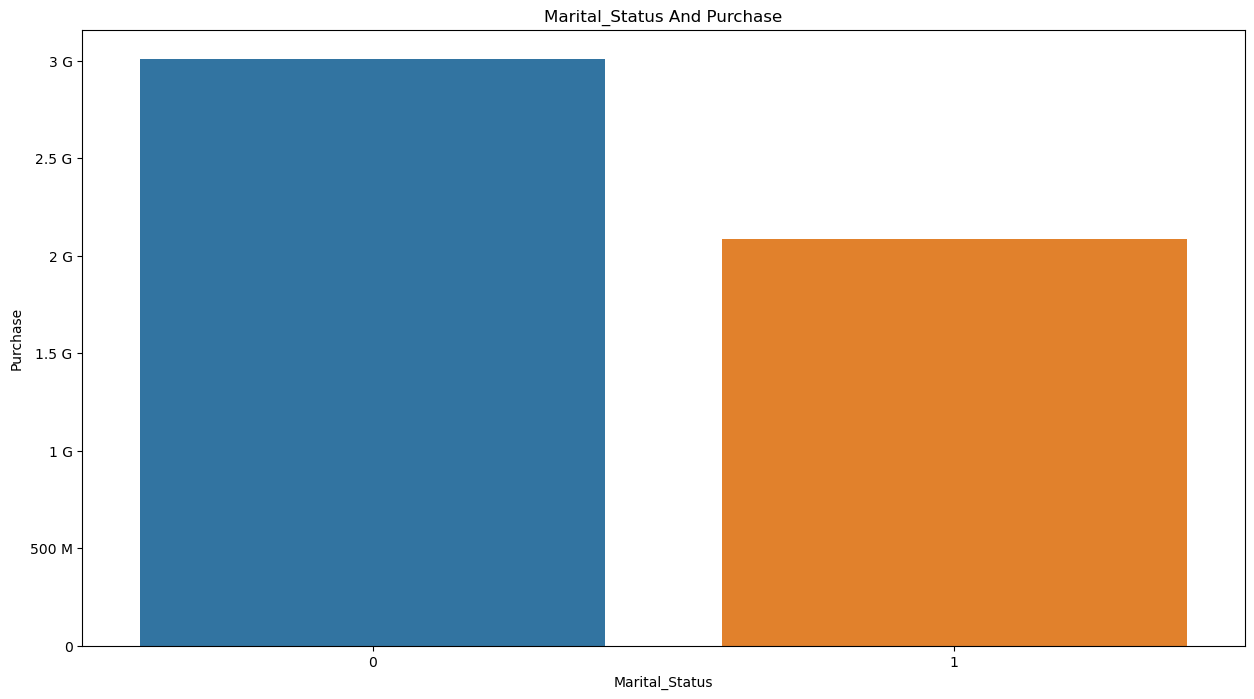

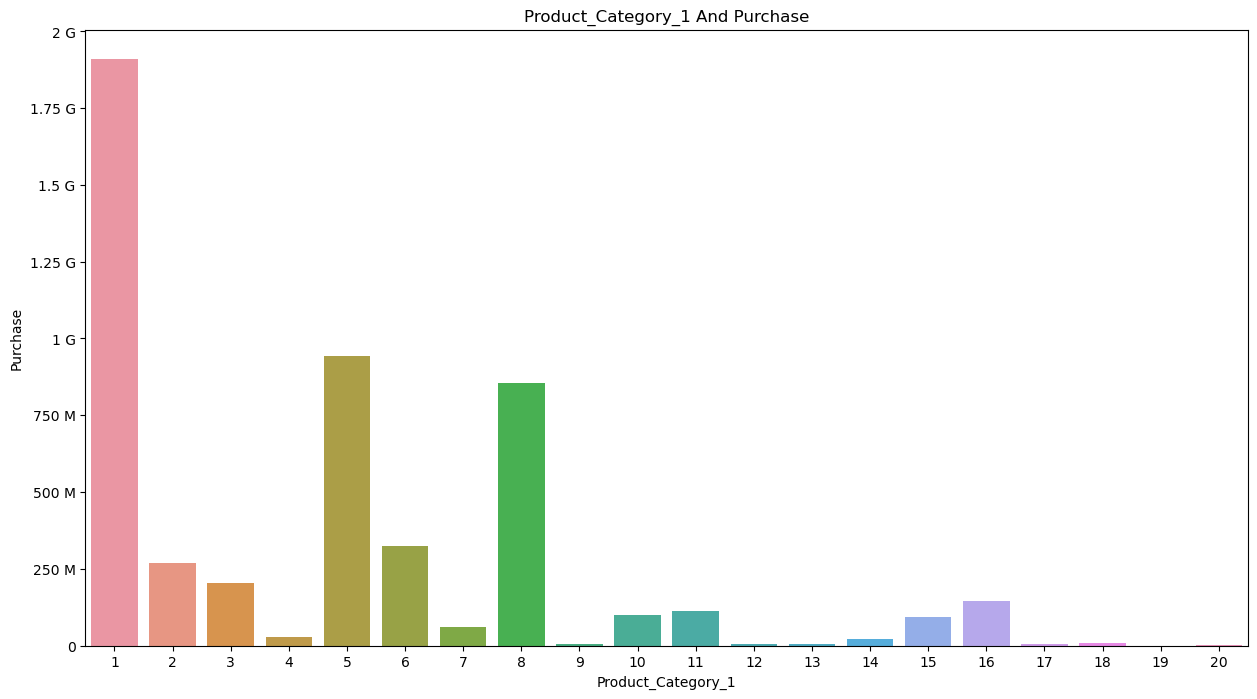

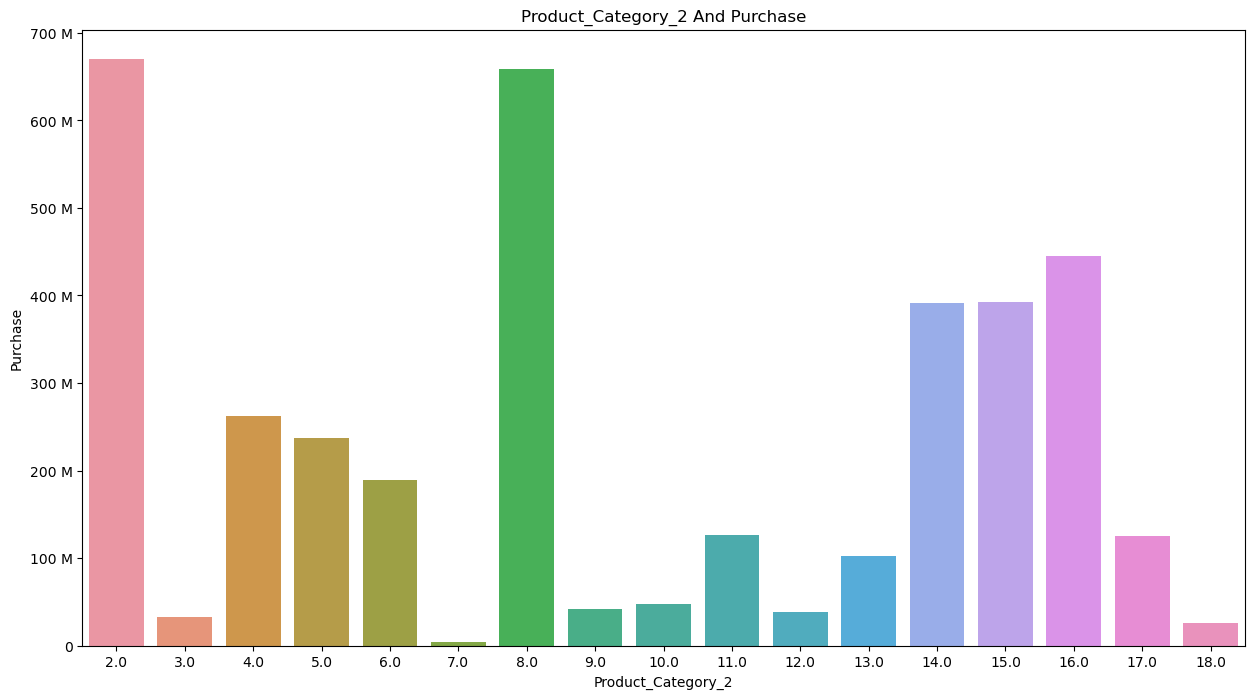

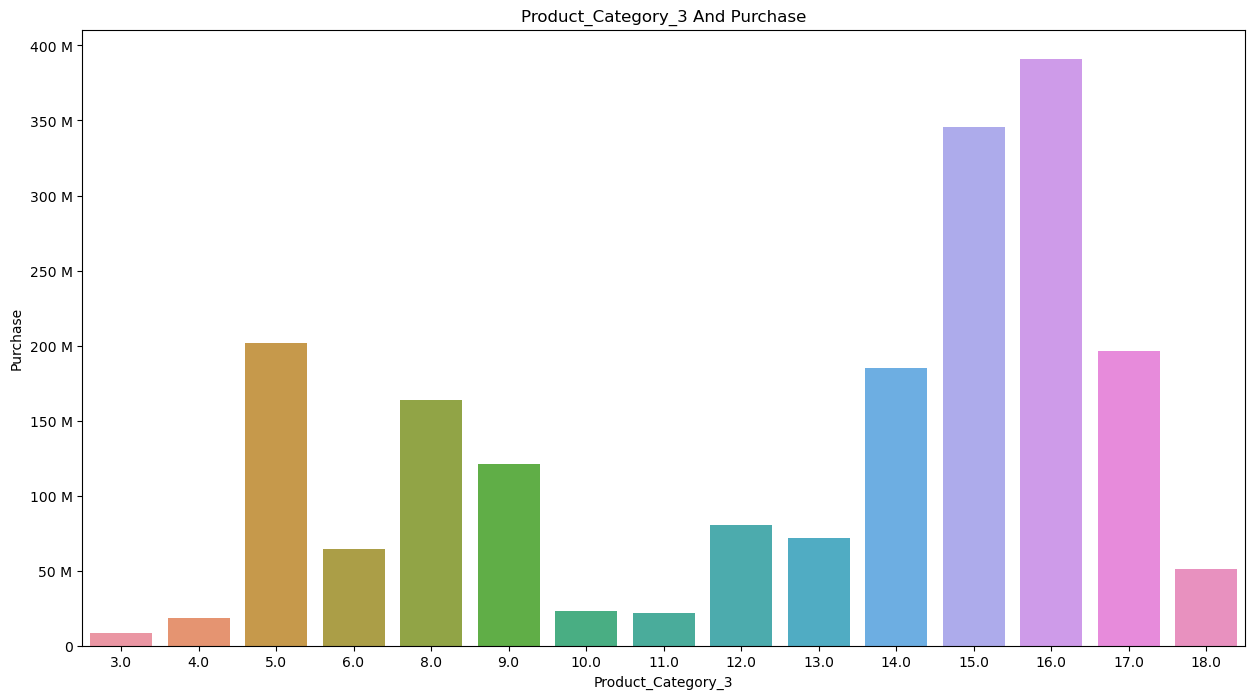

In [87]:
# Kategorik sütunların görselleştirilmesi(İki Değişkenli Analiz)
# Burada her kategori için Purchase değerlerini gözlemledik.

for categorical in categorical_columns:
    fig, ax = plt.subplots(figsize = (15,8))
    temp = bfs_data.groupby(categorical).agg({'Purchase':sum}).reset_index()
    sns.barplot(data = temp, x=categorical, y = 'Purchase', ax=ax).set(title = f"{categorical} And Purchase")
    ax.yaxis.set_major_formatter(frmt_obj)
    

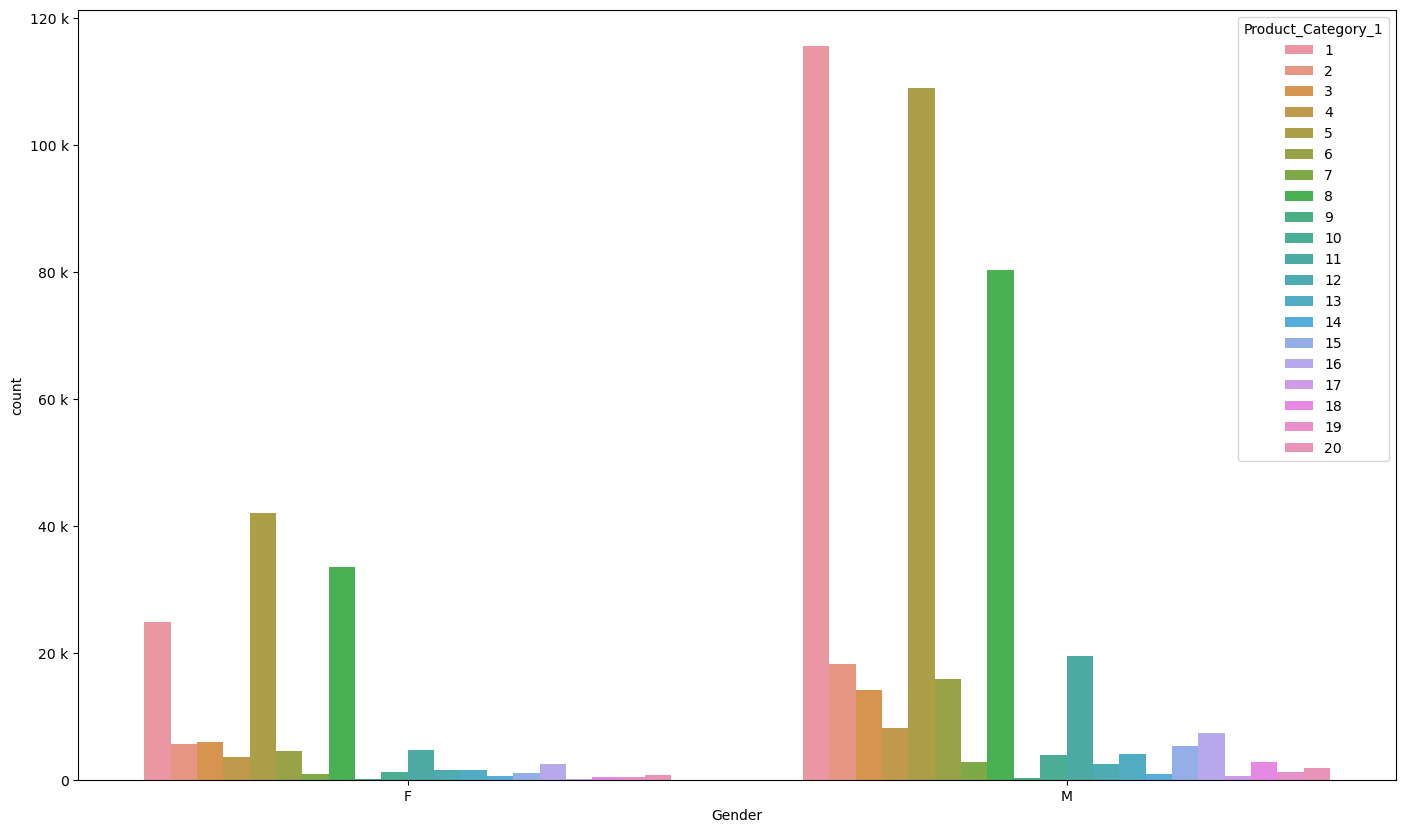

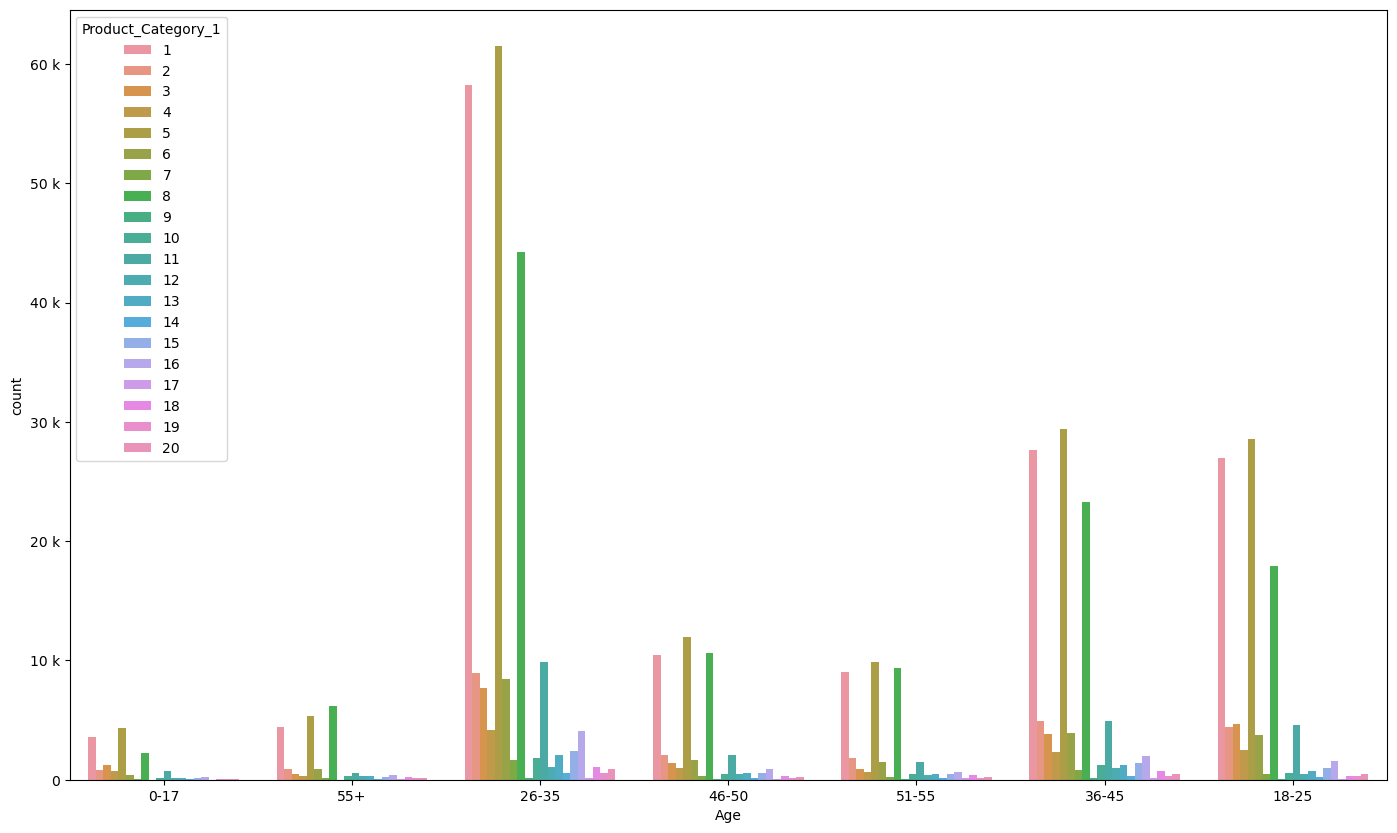

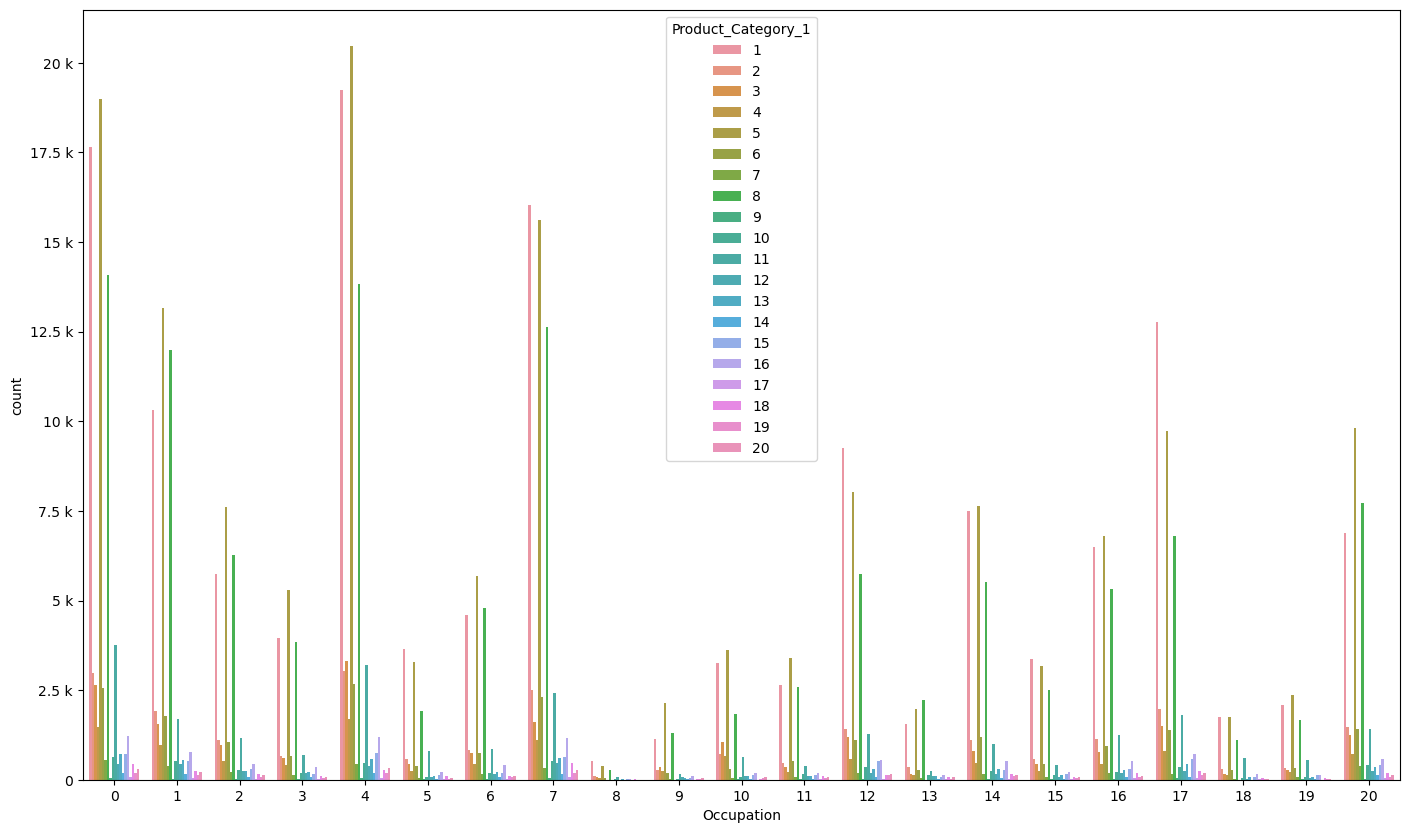

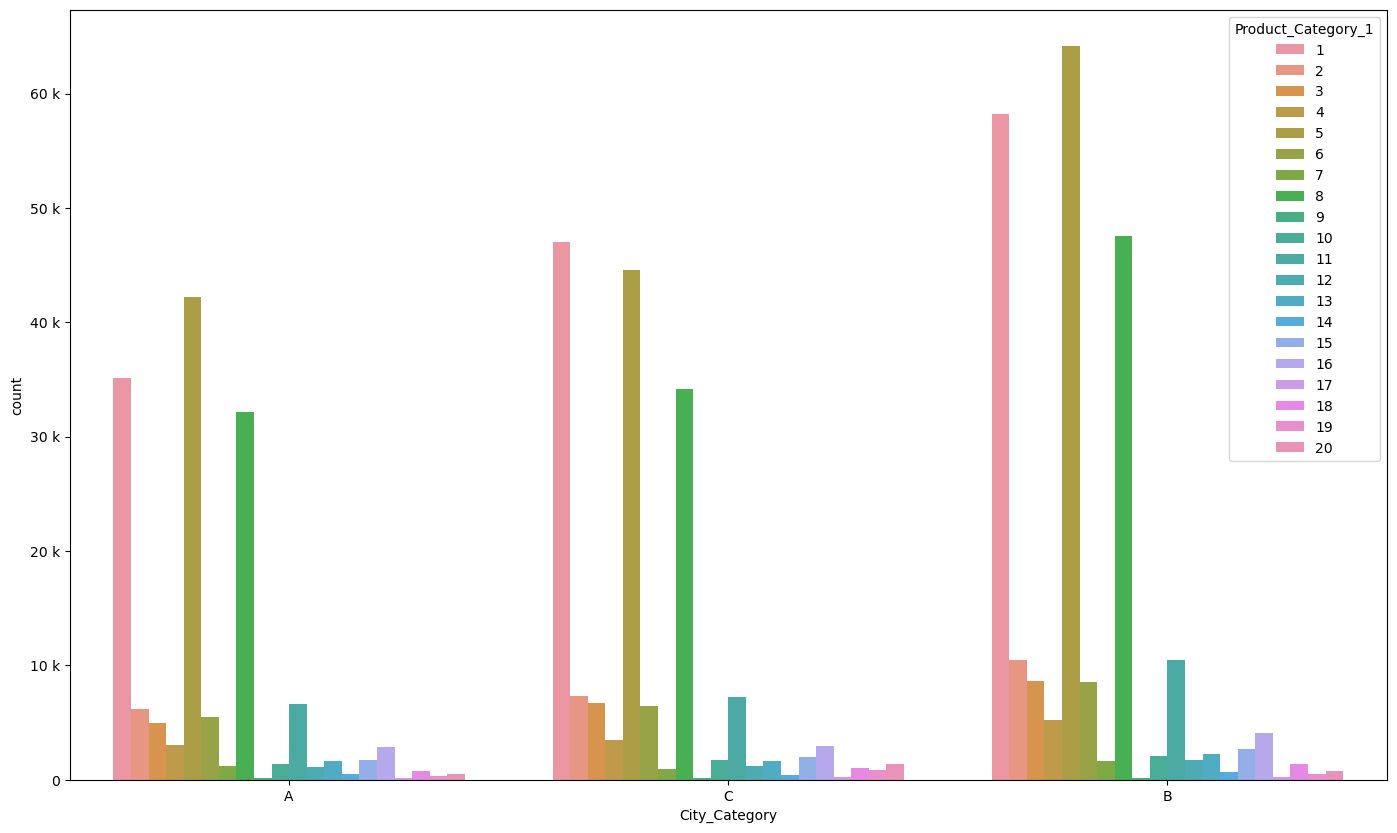

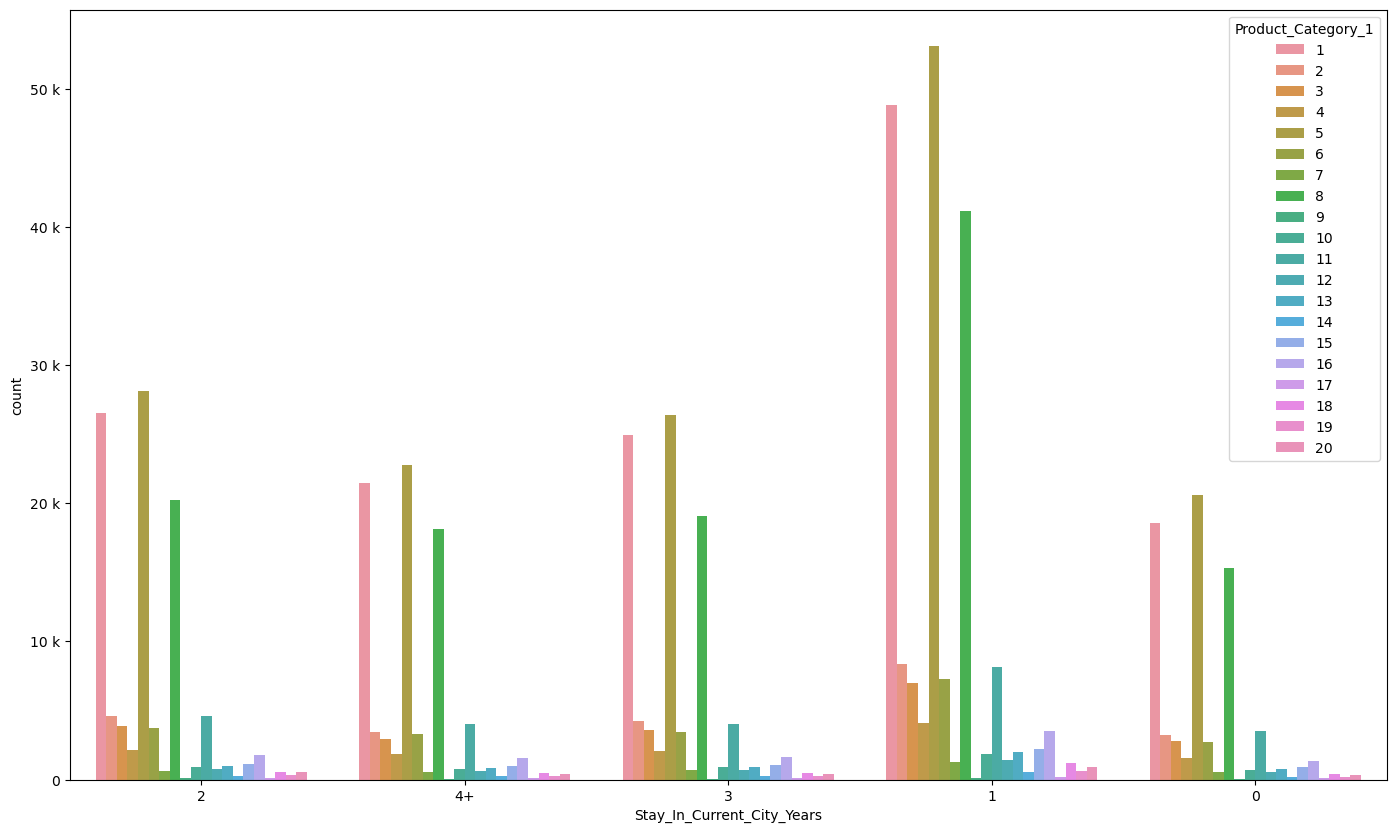

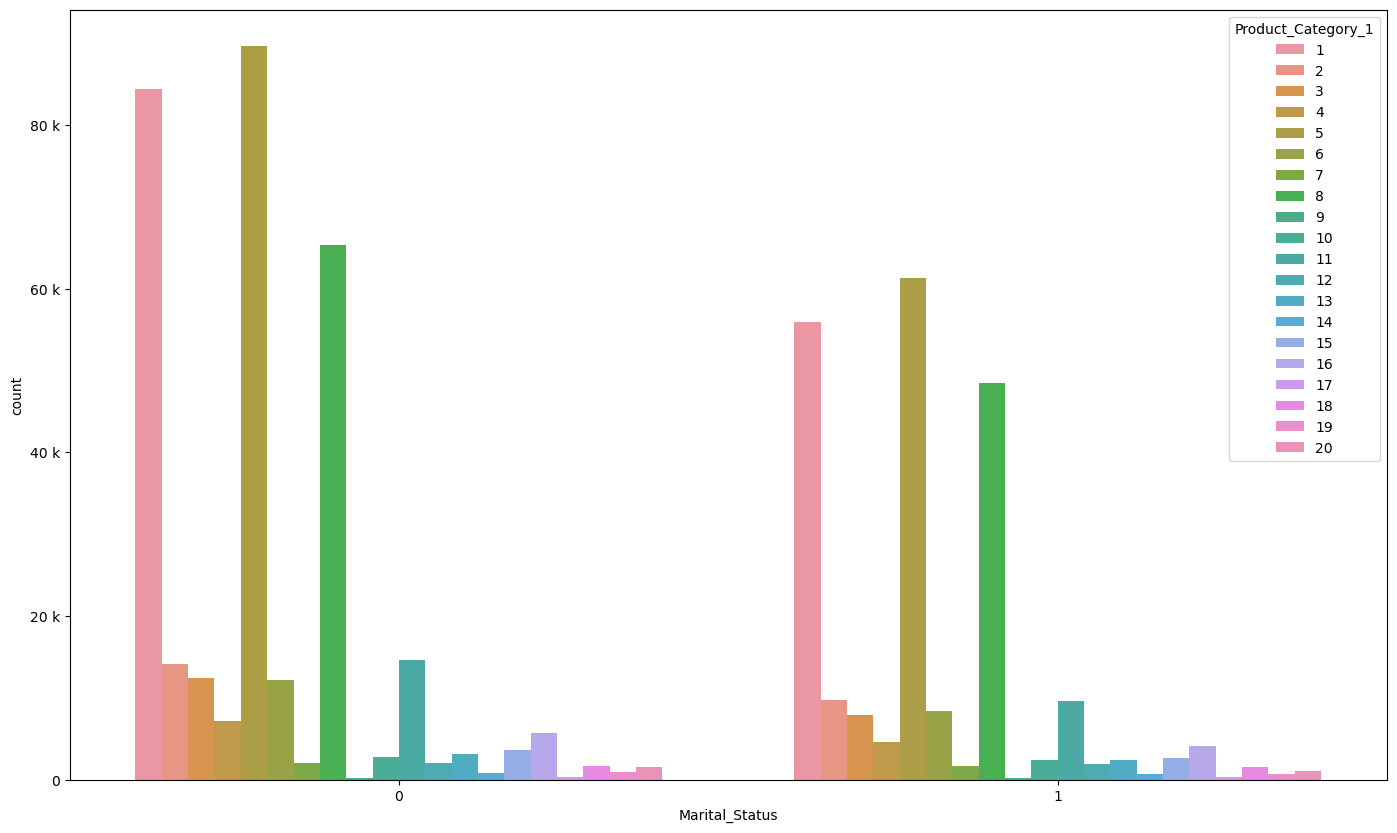

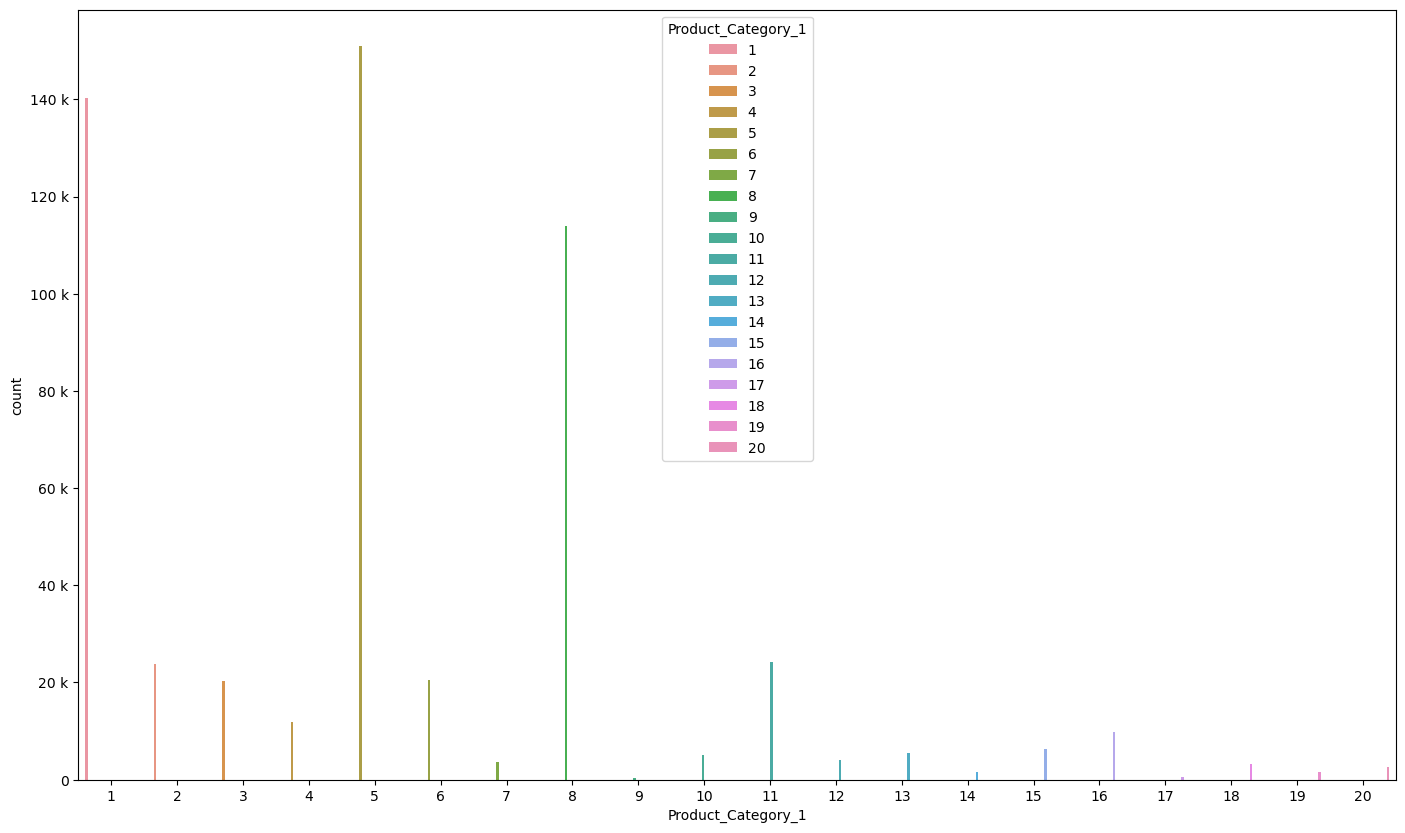

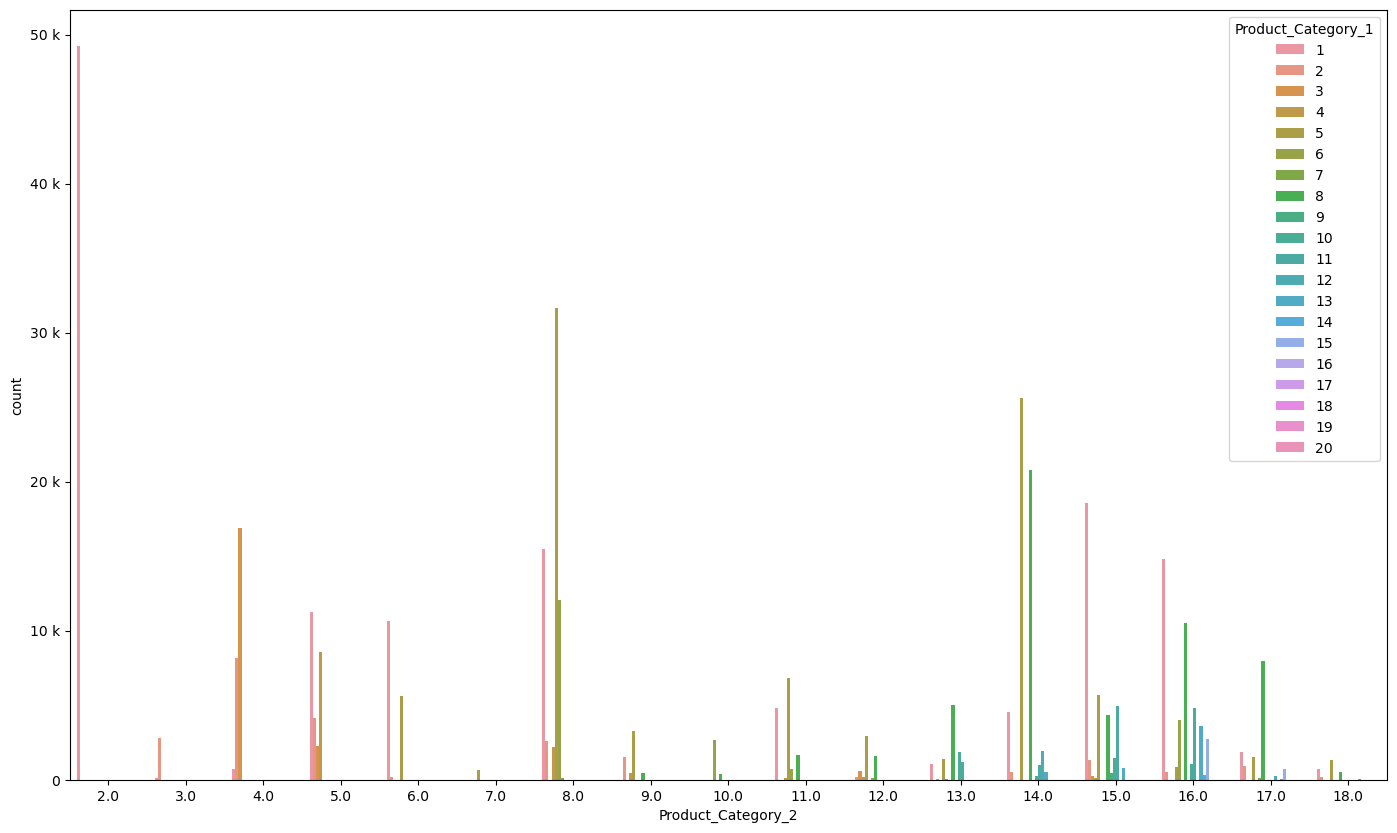

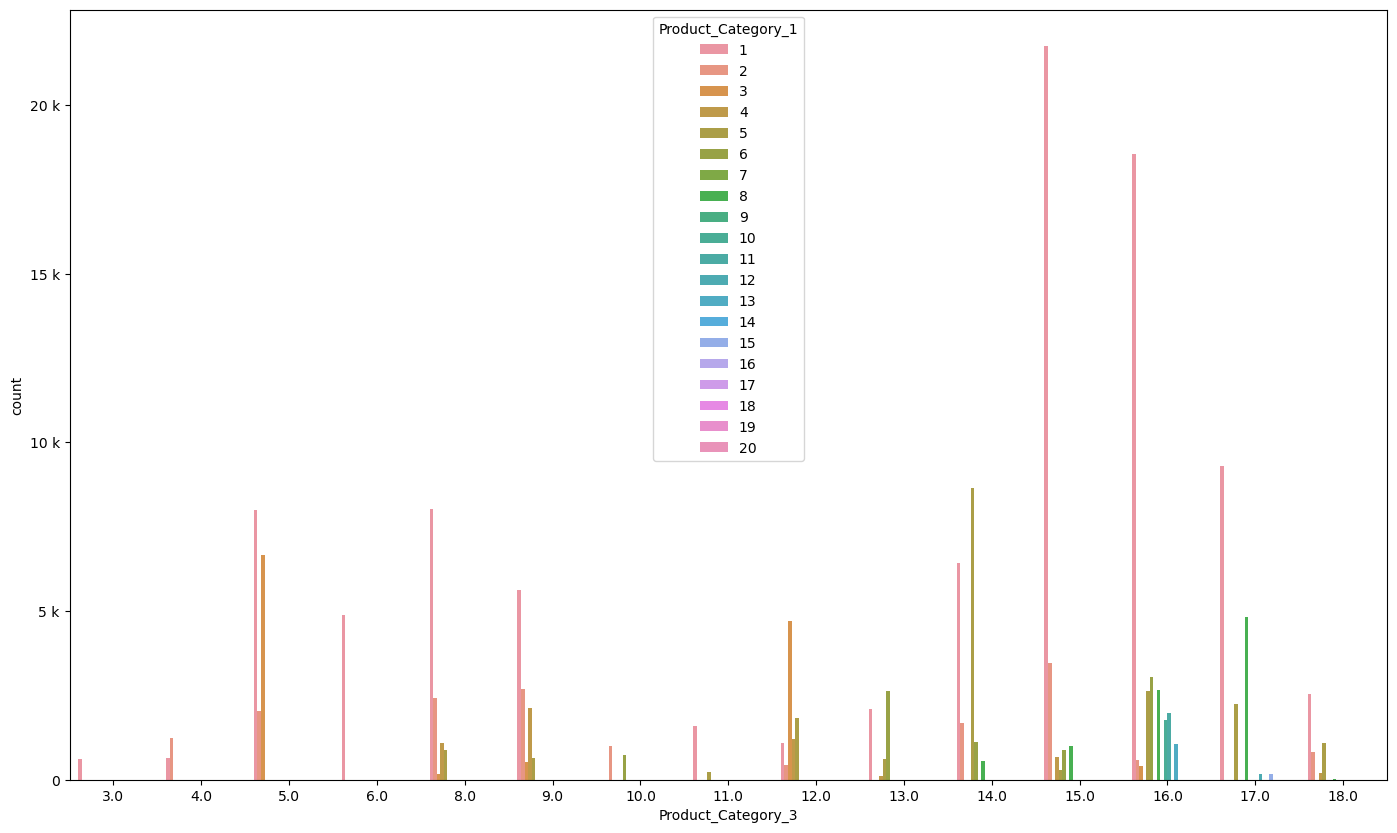

In [88]:
# Kategorilerin "Product_Category_1" sütunu ile ilişkilerini gözlemledik. 
# Bu sayede diğer kategorilerin ürün kategorileri üzerindeki etkisi hakkında fikir edindik.

for categorical in categorical_columns:
    fig, ax = plt.subplots(figsize =(17,10))
    sns.countplot(data = bfs_data, x= categorical, hue='Product_Category_1')
    ax.yaxis.set_major_formatter(frmt_obj)
    
# Grafikler göz önünde bulundurulursa kategorilerde en çok satılan ürün kategorilerinin 1, 5 ve 8 olduğu gözlenlemdi.

array([<AxesSubplot:>], dtype=object)

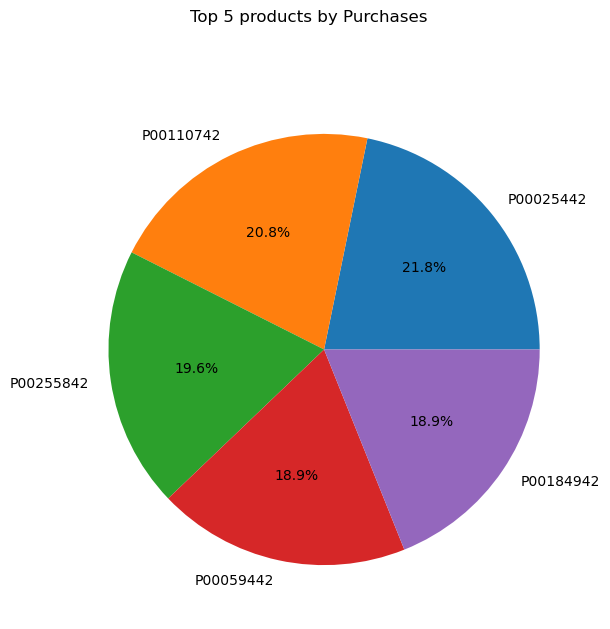

In [89]:
#Burada en çok satılan 5 ürün gözlemlendi.
top_prod=bfs_data[['Product_ID','Purchase']].groupby('Product_ID').sum()
top_prod=top_prod.sort_values(by='Purchase',ascending=False)
top_prod=top_prod.head(5)
top_prod.plot(kind='pie',title='Top 5 products by Purchases',subplots=True,autopct='%1.1f%%',legend=False,ylabel='',figsize=(12,7))

array([<AxesSubplot:>], dtype=object)

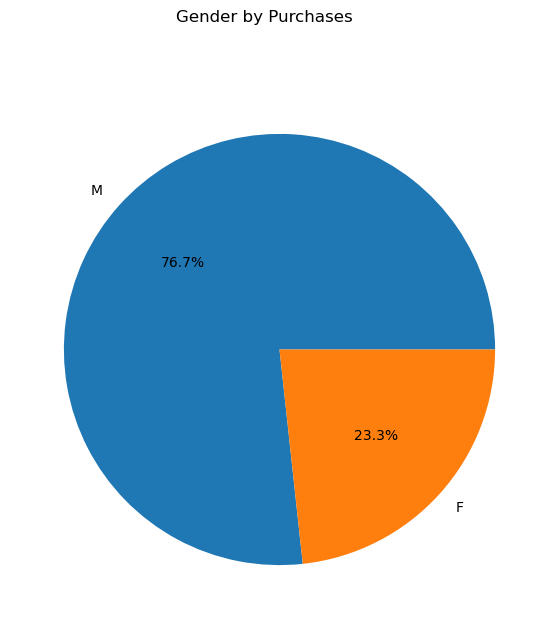

In [90]:
#Burada cinsiyete göre ürün alınımı gözlemlendi.
top_prod=bfs_data[['Gender','Purchase']].groupby('Gender').sum()
top_prod=top_prod.sort_values(by='Purchase',ascending=False)
top_prod=top_prod.head(5)
top_prod.plot(kind='pie',title='Gender by Purchases',subplots=True,autopct='%1.1f%%',legend=False,ylabel='',figsize=(12,7))

## Feature Engineering

In [188]:
import sklearn.preprocessing as sk_preprocess

In [189]:
#Veri Seti:
bfs_data

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                               2               0                  12   
4                              4+               0                   8   
...                           ...             ...                 ...   
550063                          1               1                  20   
550064                          3               0                  20   
550065                         4+               1                  20   
550066                          2               0                  20   
550067                         4+               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
0                      NaN                 NaN      8370  
1                      6.0                14.0     15200  
2                      NaN                 NaN      1422  
3                     14.0                 NaN      1057  
4                      NaN                 NaN      7969  
...                    ...                 ...       ...  
550063                 NaN                 NaN       368  
550064                 NaN                 NaN       371  
550065                 NaN                 NaN       137  
550066                 NaN                 NaN       365  
550067                 NaN                 NaN       490  

[550068 rows x 12 columns]

In [190]:
# User_ID ve Product_ID kullanılmayacağından bu sütunları kaldırdık.

bfs_data.drop(columns = ['User_ID','Product_ID'], inplace=True)

In [191]:
bfs_data

Gender    Age  Occupation City_Category Stay_In_Current_City_Years  \
0           F   0-17          10             A                          2   
1           F   0-17          10             A                          2   
2           F   0-17          10             A                          2   
3           F   0-17          10             A                          2   
4           M    55+          16             C                         4+   
...       ...    ...         ...           ...                        ...   
550063      M  51-55          13             B                          1   
550064      F  26-35           1             C                          3   
550065      F  26-35          15             B                         4+   
550066      F    55+           1             C                          2   
550067      F  46-50           0             B                         4+   

        Marital_Status  Product_Category_1  Product_Category_2  \
0                    0                   3                 NaN   
1                    0                   1                 6.0   
2                    0                  12                 NaN   
3                    0                  12                14.0   
4                    0                   8                 NaN   
...                ...                 ...                 ...   
550063               1                  20                 NaN   
550064               0                  20                 NaN   
550065               1                  20                 NaN   
550066               0                  20                 NaN   
550067               1                  20                 NaN   

        Product_Category_3  Purchase  
0                      NaN      8370  
1                     14.0     15200  
2                      NaN      1422  
3                      NaN      1057  
4                      NaN      7969  
...                    ...       ...  
550063                 NaN       368  
550064                 NaN       371  
550065                 NaN       137  
550066                 NaN       365  
550067                 NaN       490  

[550068 rows x 10 columns]

In [192]:
# Doğrulama (Validation) için bir örneklerm oluşturduk.
# Veri setini 0.3 oranında bölerek oluşturduk.

validation = bfs_data.sample(frac = 0.3, replace = False, random_state = 1)

In [193]:
validation

Gender    Age  Occupation City_Category Stay_In_Current_City_Years  \
470060      M  26-35          11             C                          0   
395974      M  51-55          16             A                          2   
14234       F  18-25          20             A                          3   
72183       M  26-35          17             B                          1   
272536      F  26-35           7             A                          0   
...       ...    ...         ...           ...                        ...   
107312      M  51-55           0             B                          3   
78226       F  18-25           3             B                          3   
36600       M  26-35           7             A                          0   
400938      M  26-35          20             A                          3   
7979        F  36-45           0             A                          0   

        Marital_Status  Product_Category_1  Product_Category_2  \
470060               0                   8                14.0   
395974               1                   4                 5.0   
14234                1                   8                14.0   
72183                1                   8                 NaN   
272536               1                   1                11.0   
...                ...                 ...                 ...   
107312               1                   5                 9.0   
78226                0                   2                 4.0   
36600                1                   1                 2.0   
400938               1                   4                 5.0   
7979                 1                  14                 NaN   

        Product_Category_3  Purchase  
470060                 NaN      8013  
395974                 8.0      2769  
14234                  NaN      5952  
72183                  NaN      9914  
272536                15.0     15472  
...                    ...       ...  
107312                14.0      3727  
78226                  NaN     13000  
36600                 13.0      7746  
400938                 NaN       748  
7979                   NaN     18380  

[165020 rows x 10 columns]

In [194]:
# Eğitim ve Test veri setlerinin belirlenmesi
# Validation olarak belirlediğimiz örneklem içindeki veriler x_train içinde bulunmamalıdır. 
# Bu sebeple o veriler veri setinden kaldırılır ve x_train elde edilir.
# 385048(train) + 165020(val/train) = 550068(total)

x_train = bfs_data.drop(validation.index, axis = 0)
x_train.reset_index(inplace=True,drop = True)
x_val = validation.reset_index(drop=True)
y_train = x_train['Purchase']
y_val = x_val['Purchase']
x_train.drop(columns = ['Purchase'],inplace=True)
x_val.drop(columns = ['Purchase'],inplace=True)

In [195]:
x_train

Gender    Age  Occupation City_Category Stay_In_Current_City_Years  \
0           F   0-17          10             A                          2   
1           F   0-17          10             A                          2   
2           M    55+          16             C                         4+   
3           M  26-35          15             A                          3   
4           M  46-50           7             B                          2   
...       ...    ...         ...           ...                        ...   
385043      M  46-50           7             A                          3   
385044      M  51-55          13             B                          1   
385045      F  26-35          15             B                         4+   
385046      F    55+           1             C                          2   
385047      F  46-50           0             B                         4+   

        Marital_Status  Product_Category_1  Product_Category_2  \
0                    0                   3                 NaN   
1                    0                   1                 6.0   
2                    0                   8                 NaN   
3                    0                   1                 2.0   
4                    1                   1                 8.0   
...                ...                 ...                 ...   
385043               0                  20                 NaN   
385044               1                  20                 NaN   
385045               1                  20                 NaN   
385046               0                  20                 NaN   
385047               1                  20                 NaN   

        Product_Category_3  
0                      NaN  
1                     14.0  
2                      NaN  
3                      NaN  
4                     17.0  
...                    ...  
385043                 NaN  
385044                 NaN  
385045                 NaN  
385046                 NaN  
385047                 NaN  

[385048 rows x 9 columns]

y_train

In [196]:
x_val

Gender    Age  Occupation City_Category Stay_In_Current_City_Years  \
0           M  26-35          11             C                          0   
1           M  51-55          16             A                          2   
2           F  18-25          20             A                          3   
3           M  26-35          17             B                          1   
4           F  26-35           7             A                          0   
...       ...    ...         ...           ...                        ...   
165015      M  51-55           0             B                          3   
165016      F  18-25           3             B                          3   
165017      M  26-35           7             A                          0   
165018      M  26-35          20             A                          3   
165019      F  36-45           0             A                          0   

        Marital_Status  Product_Category_1  Product_Category_2  \
0                    0                   8                14.0   
1                    1                   4                 5.0   
2                    1                   8                14.0   
3                    1                   8                 NaN   
4                    1                   1                11.0   
...                ...                 ...                 ...   
165015               1                   5                 9.0   
165016               0                   2                 4.0   
165017               1                   1                 2.0   
165018               1                   4                 5.0   
165019               1                  14                 NaN   

        Product_Category_3  
0                      NaN  
1                      8.0  
2                      NaN  
3                      NaN  
4                     15.0  
...                    ...  
165015                14.0  
165016                 NaN  
165017                13.0  
165018                 NaN  
165019                 NaN  

[165020 rows x 9 columns]

y_val

In [197]:
class feature_engineering:
    
    def __init__(self,training_data = x_train):
        self.prod_cat2_mode = x_train['Product_Category_2'].mode().item()
        self.prod_cat3_mode = x_train['Product_Category_3'].mode().item()
        self.std_scaler = sk_preprocess.StandardScaler()
    
    # Encoding İşlemi:
    def do_encoding(self,df): 
        
        # Gender - female ve Male değişkenlerine nümerik değerler atadık.
        df['Gender'] = df['Gender'].map({'F':0,'M':1})

        # Age - yaş aralıkları string olarak verildiğinden bu aralıklara nümerik değerler atadık.
        df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

        # City_Category - bu kategori değişkenini dummy değişken olarak belirledik.
        city_cats = pd.get_dummies(df['City_Category'],drop_first = True)
        df = pd.concat([df,city_cats],axis=1)
        df.drop(columns = ['City_Category'] , inplace=True)
        

        # Stay_In_Current_City_Years - unique değerleri bularak bu değişkeni düzenledik.
        df['Stay_In_Current_City_Years'].unique()
        df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+','4').astype(int)

        return df
    
    # Eksik Veri Çözümleme - eksik verilein yerine mod değerlerini atadık. 
    def fillna_with_mode(self,df): 
        df['Product_Category_2'] = df['Product_Category_2'].fillna(self.prod_cat2_mode)
        df['Product_Category_3'] = df['Product_Category_3'].fillna(self.prod_cat3_mode)
        
        return df
    
     # Nitelik Ölçeklendirme :
    def scaling(self,df,train):
        cols = df.columns
        if train:
            print('Fitting train for scaling')
            self.std_scaler.fit(df)
        df = self.std_scaler.transform(df)
        df = pd.DataFrame(df,columns = cols)
        
        return df
    
    # MAIN_FUNCTION
    def do_all(self,df,train = False):
        df = self.do_encoding(df = df.copy())
        df = self.fillna_with_mode(df = df.copy())
        df_ = self.scaling(df,train = train)
        if train:
            return df,df_
        return df

In [198]:
# Ölçeklendirme yapılmış ve ölçeklendirme yapılmamış sütunları karşılaştırdık.

def before_vs_after_scaling(df,df_scaled):
    df_scaled.columns = df.columns
    print(df.columns)
    no_of_columns = df.shape[1]
    fig,ax = plt.subplots(no_of_columns,2,figsize = (30,60))
    col_list = df.columns
    
    for col, col_name in zip(range(no_of_columns),col_list):
        sns.histplot(data = df[col_name],kde = True, ax= ax[col,0])
        ax[col,0].set_title(f"Non scaled {col_name} distribution")
        
        sns.histplot(data = df[col_name],kde = True, ax= ax[col,1])
        ax[col,1].set_title(f"Scaled {col_name} distribution")

In [199]:
x_train.head()

Gender    Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F   0-17          10             A                          2   
1      F   0-17          10             A                          2   
2      M    55+          16             C                         4+   
3      M  26-35          15             A                          3   
4      M  46-50           7             B                          2   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  
0               0                   3                 NaN                 NaN  
1               0                   1                 6.0                14.0  
2               0                   8                 NaN                 NaN  
3               0                   1                 2.0                 NaN  
4               1                   1                 8.0                17.0

In [200]:
x_val.head()

Gender    Age  Occupation City_Category Stay_In_Current_City_Years  \
0      M  26-35          11             C                          0   
1      M  51-55          16             A                          2   
2      F  18-25          20             A                          3   
3      M  26-35          17             B                          1   
4      F  26-35           7             A                          0   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  
0               0                   8                14.0                 NaN  
1               1                   4                 5.0                 8.0  
2               1                   8                14.0                 NaN  
3               1                   8                 NaN                 NaN  
4               1                   1                11.0                15.0

In [201]:
feat_eng = feature_engineering(training_data = x_train.copy())

In [204]:
non_scaled_x_train,x_train = feat_eng.do_all(df = x_train.copy(),train = True)
x_val = feat_eng.do_all(df = x_val.copy())

Fitting train for scaling


In [203]:
x_train

Gender    Age  Occupation City_Category Stay_In_Current_City_Years  \
0           F   0-17          10             A                          2   
1           F   0-17          10             A                          2   
2           M    55+          16             C                         4+   
3           M  26-35          15             A                          3   
4           M  46-50           7             B                          2   
...       ...    ...         ...           ...                        ...   
385043      M  46-50           7             A                          3   
385044      M  51-55          13             B                          1   
385045      F  26-35          15             B                         4+   
385046      F    55+           1             C                          2   
385047      F  46-50           0             B                         4+   

        Marital_Status  Product_Category_1  Product_Category_2  \
0                    0                   3                 NaN   
1                    0                   1                 6.0   
2                    0                   8                 NaN   
3                    0                   1                 2.0   
4                    1                   1                 8.0   
...                ...                 ...                 ...   
385043               0                  20                 NaN   
385044               1                  20                 NaN   
385045               1                  20                 NaN   
385046               0                  20                 NaN   
385047               1                  20                 NaN   

        Product_Category_3  
0                      NaN  
1                     14.0  
2                      NaN  
3                      NaN  
4                     17.0  
...                    ...  
385043                 NaN  
385044                 NaN  
385045                 NaN  
385046                 NaN  
385047                 NaN  

[385048 rows x 9 columns]

In [175]:
x_val.head()

Gender    Age  Occupation City_Category Stay_In_Current_City_Years  \
0      M  26-35          11             C                          0   
1      M  51-55          16             A                          2   
2      F  18-25          20             A                          3   
3      M  26-35          17             B                          1   
4      F  26-35           7             A                          0   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  
0               0                   8                14.0                 NaN  
1               1                   4                 5.0                 8.0  
2               1                   8                14.0                 NaN  
3               1                   8                 NaN                 NaN  
4               1                   1                11.0                15.0

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'B', 'C'],
      dtype='object')


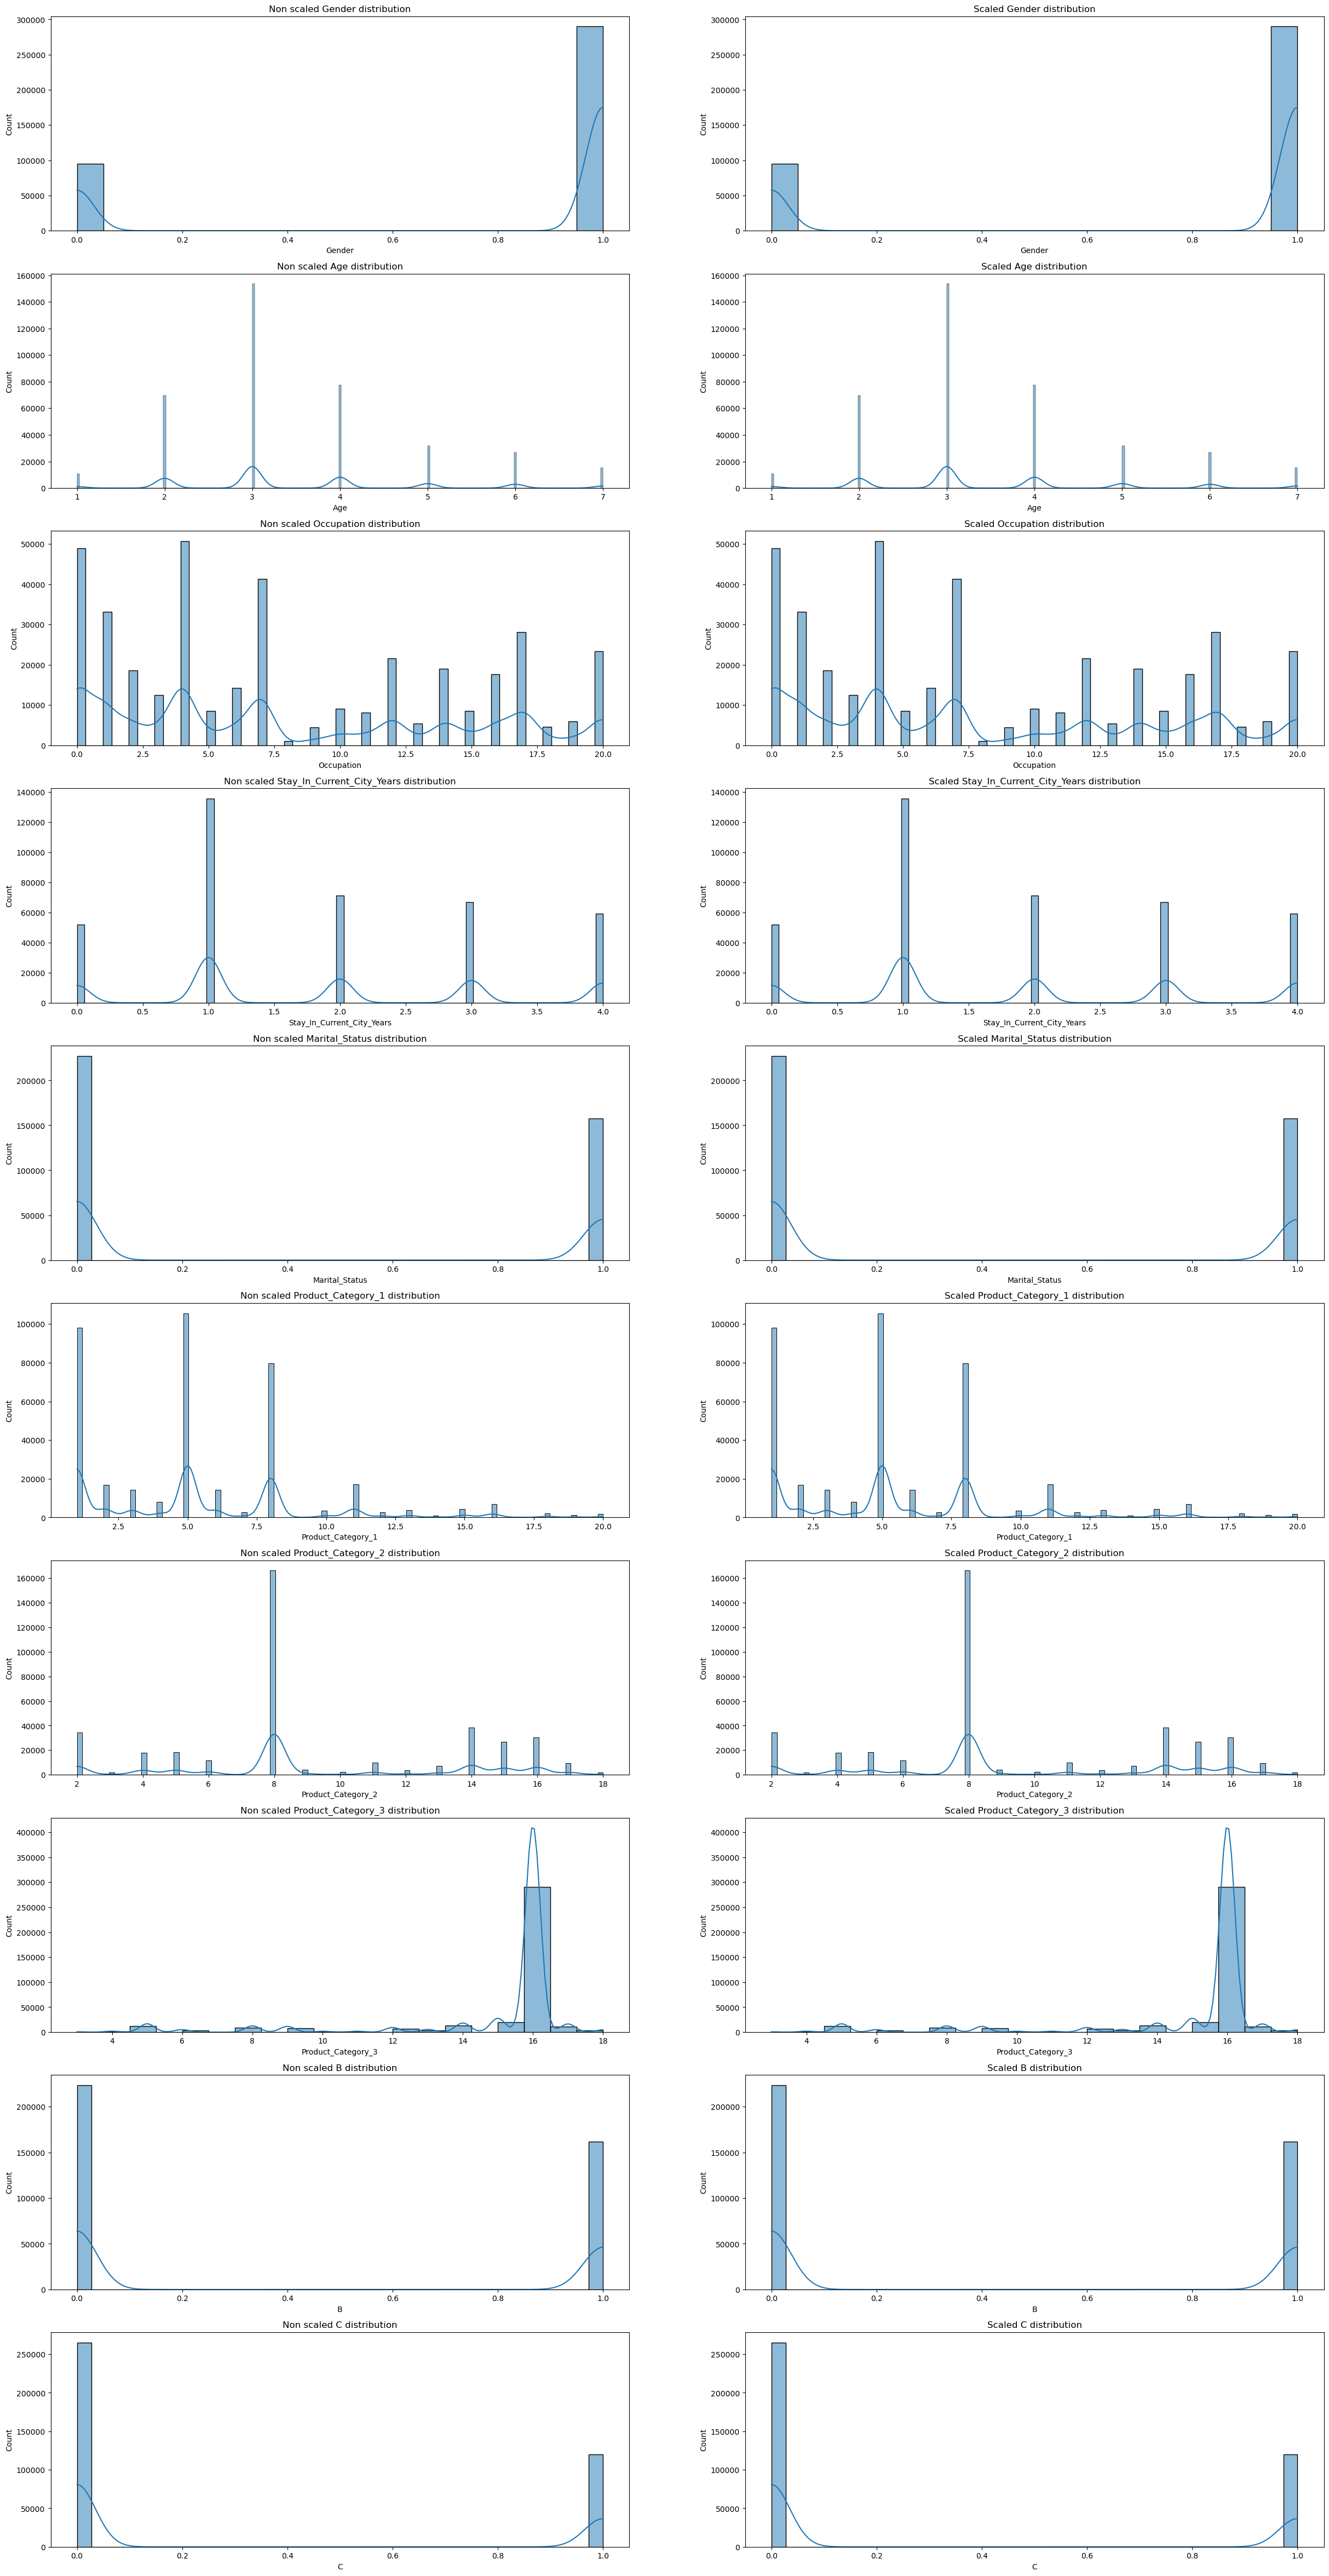

In [108]:
before_vs_after_scaling(df = non_scaled_x_train, df_scaled = x_train)

In [55]:
# Sütunların koelasyonlarını hesapladık.
x_train.corr()

Gender       Age  Occupation  \
Gender                      1.000000 -0.004854    0.118063   
Age                        -0.004854  1.000000    0.092017   
Occupation                  0.118063  0.092017    1.000000   
Stay_In_Current_City_Years  0.016667 -0.005659    0.030439   
Marital_Status             -0.012404  0.312244    0.023608   
Product_Category_1         -0.044707  0.060175   -0.008398   
Product_Category_2         -0.011690  0.040331    0.002212   
Product_Category_3         -0.005247  0.035623   -0.001603   
B                          -0.006140 -0.018640   -0.010927   
C                          -0.000683  0.111330    0.034972   

                            Stay_In_Current_City_Years  Marital_Status  \
Gender                                        0.016667       -0.012404   
Age                                          -0.005659        0.312244   
Occupation                                    0.030439        0.023608   
Stay_In_Current_City_Years                    1.000000       -0.013376   
Marital_Status                               -0.013376        1.000000   
Product_Category_1                           -0.004868        0.019219   
Product_Category_2                           -0.000913        0.009758   
Product_Category_3                           -0.000025        0.013907   
B                                             0.010978       -0.001545   
C                                             0.010901        0.033075   

                            Product_Category_1  Product_Category_2  \
Gender                               -0.044707           -0.011690   
Age                                   0.060175            0.040331   
Occupation                           -0.008398            0.002212   
Stay_In_Current_City_Years           -0.004868           -0.000913   
Marital_Status                        0.019219            0.009758   
Product_Category_1                    1.000000            0.279401   
Product_Category_2                    0.279401            1.000000   
Product_Category_3                    0.319406            0.464290   
B                                    -0.006547           -0.002900   
C                                    -0.008723           -0.001527   

                            Product_Category_3         B         C  
Gender                               -0.005247 -0.006140 -0.000683  
Age                                   0.035623 -0.018640  0.111330  
Occupation                           -0.001603 -0.010927  0.034972  
Stay_In_Current_City_Years           -0.000025  0.010978  0.010901  
Marital_Status                        0.013907 -0.001545  0.033075  
Product_Category_1                    0.319406 -0.006547 -0.008723  
Product_Category_2                    0.464290 -0.002900 -0.001527  
Product_Category_3                    1.000000  0.003879 -0.021529  
B                                     0.003879  1.000000 -0.572154  
C                                    -0.021529 -0.572154  1.000000

In [56]:
# Korelasyon matrisini bulduk.
correlation_matrix = pd.concat([x_train,y_train],axis=1).corr()

In [57]:
correlation_matrix

Gender       Age  Occupation  \
Gender                      1.000000 -0.004854    0.118063   
Age                        -0.004854  1.000000    0.092017   
Occupation                  0.118063  0.092017    1.000000   
Stay_In_Current_City_Years  0.016667 -0.005659    0.030439   
Marital_Status             -0.012404  0.312244    0.023608   
Product_Category_1         -0.044707  0.060175   -0.008398   
Product_Category_2         -0.011690  0.040331    0.002212   
Product_Category_3         -0.005247  0.035623   -0.001603   
B                          -0.006140 -0.018640   -0.010927   
C                          -0.000683  0.111330    0.034972   
Purchase                    0.058988  0.017643    0.020377   

                            Stay_In_Current_City_Years  Marital_Status  \
Gender                                        0.016667       -0.012404   
Age                                          -0.005659        0.312244   
Occupation                                    0.030439        0.023608   
Stay_In_Current_City_Years                    1.000000       -0.013376   
Marital_Status                               -0.013376        1.000000   
Product_Category_1                           -0.004868        0.019219   
Product_Category_2                           -0.000913        0.009758   
Product_Category_3                           -0.000025        0.013907   
B                                             0.010978       -0.001545   
C                                             0.010901        0.033075   
Purchase                                      0.004130       -0.000648   

                            Product_Category_1  Product_Category_2  \
Gender                               -0.044707           -0.011690   
Age                                   0.060175            0.040331   
Occupation                           -0.008398            0.002212   
Stay_In_Current_City_Years           -0.004868           -0.000913   
Marital_Status                        0.019219            0.009758   
Product_Category_1                    1.000000            0.279401   
Product_Category_2                    0.279401            1.000000   
Product_Category_3                    0.319406            0.464290   
B                                    -0.006547           -0.002900   
C                                    -0.008723           -0.001527   
Purchase                             -0.343513           -0.128356   

                            Product_Category_3         B         C  Purchase  
Gender                               -0.005247 -0.006140 -0.000683  0.058988  
Age                                   0.035623 -0.018640  0.111330  0.017643  
Occupation                           -0.001603 -0.010927  0.034972  0.020377  
Stay_In_Current_City_Years           -0.000025  0.010978  0.010901  0.004130  
Marital_Status                        0.013907 -0.001545  0.033075 -0.000648  
Product_Category_1                    0.319406 -0.006547 -0.008723 -0.343513  
Product_Category_2                    0.464290 -0.002900 -0.001527 -0.128356  
Product_Category_3                    1.000000  0.003879 -0.021529 -0.187407  
B                                     0.003879  1.000000 -0.572154 -0.019849  
C                                    -0.021529 -0.572154  1.000000  0.061381  
Purchase                             -0.187407 -0.019849  0.061381  1.000000

<AxesSubplot:>

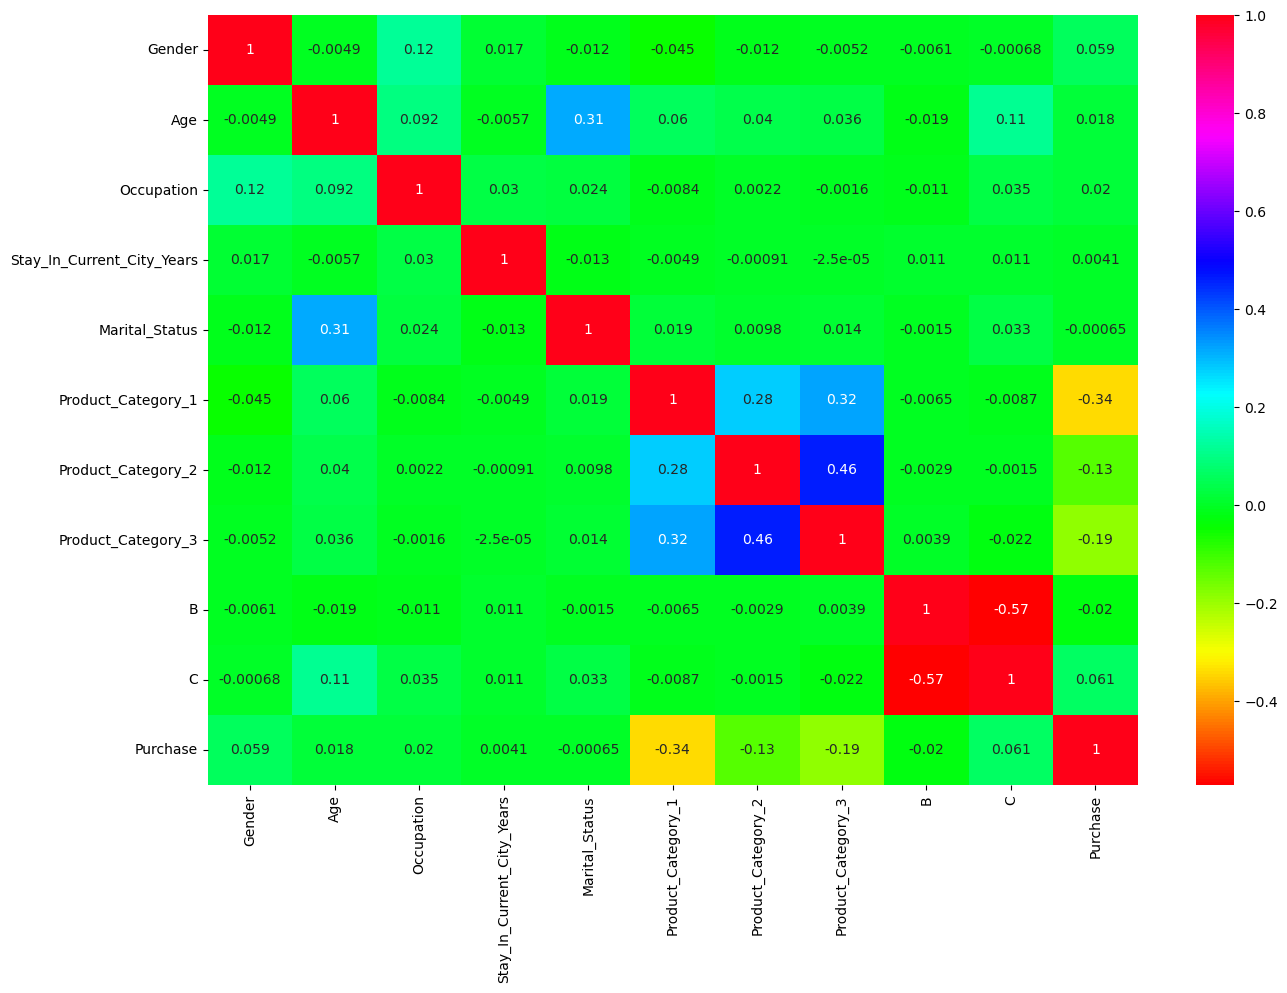

In [58]:
# Korelasyon Matrisini görselleştirdik.
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(data = correlation_matrix,annot = True,cmap='hsv')

## Model Oluşturma

1. Linear Regression
2. Descision tree regression
3. Random forest regression
4. Knn regression
5. Gradient boost reg

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.metrics import mean_squared_error,r2_score

In [60]:
x_train = x_train.copy() #ölçeklendirilmiş x değerleri
non_scaled_x_train = non_scaled_x_train.copy() #ölçeklendirilmemiş x değerleri
y_train = y_train.copy()
x_test =  x_val.copy() # Test x Değerleri
y_actual = y_val.copy() # Gerçek y Değerleri

scaled_models=dict()
non_scaled_models=dict()
test_models=dict()

scaled_predicts=dict()
non_scaled_predicts=dict()
test_predicts=dict()



In [61]:
# Linear Regression Modeli

LR_model = LinearRegression()

LR_model_scaled = LR_model.fit(x_train.copy(),y_train.copy())
LR_predict_scaled = LR_model.predict(x_train.copy())
LR_r2score_scaled = r2_score(y_train.copy(), LR_predict_scaled)
LR_mse_scaled = mean_squared_error(y_train.copy(), LR_predict_scaled)
scaled_models['scaled_LR'] = LR_model_scaled
scaled_predicts['scaled_LR'] = LR_predict_scaled

LR_model_non_scaled = LR_model.fit(non_scaled_x_train.copy(),y_train.copy())
LR_predict_non_scaled = LR_model.predict(non_scaled_x_train.copy())
LR_r2score_non_scaled = r2_score(y_train.copy(), LR_predict_non_scaled)
LR_mse_non_scaled = mean_squared_error(y_train.copy(), LR_predict_non_scaled)
non_scaled_models['non_scaled_LR'] = LR_model_non_scaled
non_scaled_predicts['non_scaled_LR'] = LR_predict_non_scaled


LR_model_test = LR_model.fit(x_train.copy(),y_train.copy())
LR_predict_test = LR_model.predict(x_test.copy())
LR_r2score_test = r2_score(y_actual.copy(), LR_predict_test)
LR_mse_test = mean_squared_error(y_actual.copy(), LR_predict_test)
test_models['test_LR'] = LR_model_test
test_predicts['test_LR'] = LR_predict_test

#sonuçları bir tablo olarak görmek için:
predict_data = np.array([[LR_predict_scaled], [LR_predict_non_scaled], [LR_predict_test]])
predict_row_name = ['Scaled Data', 'Non Scaled Data', 'Test Data']
predict_column_name = ['Predict']
predict_dataset = pd.DataFrame(data=predict_data,index = predict_row_name ,columns=predict_column_name)
print(predict_dataset)

print('\n')
#sonuçları bir tablo olarak görmek için:
data = np.array([[LR_r2score_scaled,LR_mse_scaled], [LR_r2score_non_scaled,LR_mse_non_scaled], [LR_r2score_test,LR_mse_test]])
row_name = ['Scaled Data', 'Non Scaled Data', 'Test Data']
column_name = ['R2 Score','MSE']
dataset = pd.DataFrame(data=data,index = row_name ,columns=column_name)
print(dataset)


                                                           Predict
Scaled Data      [9138.693486698756, 10259.02849192239, 9110.12...
Non Scaled Data  [9138.693486698758, 10259.028491922394, 9110.1...
Test Data        [-8917.525237086189, 1291.5064718149806, -9298...


                 R2 Score           MSE
Scaled Data       0.13129  2.190270e+07
Non Scaled Data   0.13129  2.190270e+07
Test Data        -8.45255  2.389005e+08


In [62]:
# Descision tree regression Modeli

DTR_model = DecisionTreeRegressor()

DTR_model_scaled = DTR_model.fit(x_train.copy(),y_train.copy())
DTR_predict_scaled = DTR_model.predict(x_train.copy())
DTR_r2score_scaled = r2_score(y_train.copy(), DTR_predict_scaled)
DTR_mse_scaled = mean_squared_error(y_train.copy(), DTR_predict_scaled)
scaled_models['scaled_DTR'] = DTR_model_scaled
scaled_predicts['scaled_LR'] = DTR_predict_scaled


DTR_model_non_scaled = DTR_model.fit(non_scaled_x_train.copy(),y_train.copy())
DTR_predict_non_scaled = DTR_model.predict(non_scaled_x_train.copy())
DTR_r2score_non_scaled = r2_score(y_train.copy(),DTR_predict_non_scaled)
DTR_mse_non_scaled = mean_squared_error(y_train.copy(), DTR_predict_non_scaled)
non_scaled_models['non_scaled_DTR'] = DTR_model_non_scaled
non_scaled_predicts['non_scaled_DTR'] = DTR_predict_non_scaled



DTR_model_test = DTR_model.fit(x_train.copy(),y_train.copy())
DTR_predict_test = DTR_model.predict(x_test.copy())
DTR_r2score_test = r2_score(y_actual.copy(), DTR_predict_test)
DTR_mse_test = mean_squared_error(y_actual.copy(), DTR_predict_test)
test_models['test_DTR'] = DTR_model_test
test_predicts['test_DTR'] = DTR_predict_test

#sonuçları bir tablo olarak görmek için:
predict_data = np.array([[DTR_predict_scaled], [DTR_predict_non_scaled], [DTR_predict_test]])
predict_row_name = ['Scaled Data', 'Non Scaled Data', 'Test Data']
predict_column_name = ['Predict']
predict_dataset = pd.DataFrame(data=predict_data,index = predict_row_name ,columns=predict_column_name)
print(predict_dataset)

print('\n')
#sonuçları bir tablo olarak görmek için:
data = np.array([[DTR_r2score_scaled,DTR_mse_scaled], [DTR_r2score_non_scaled,DTR_mse_non_scaled], [DTR_r2score_test,DTR_mse_test]])
row_name = ['Scaled Data', 'Non Scaled Data', 'Test Data']
column_name = ['R2 Score','MSE']
dataset = pd.DataFrame(data=data,index = row_name ,columns=column_name)
print(dataset)

                                                           Predict
Scaled Data      [8370.0, 17448.0, 8437.6875, 13629.5, 19396.87...
Non Scaled Data  [8370.0, 17448.0, 8437.6875, 13629.5, 19396.87...
Test Data        [129.0, 134.0, 134.0, 251.0, 18928.0, 134.0, 1...


                 R2 Score           MSE
Scaled Data      0.795634  5.152666e+06
Non Scaled Data  0.795634  5.152666e+06
Test Data       -1.691892  6.803396e+07


In [63]:
# Random Forest regression Modeli

RND_model = RandomForestRegressor()

RND_model_scaled = RND_model.fit(x_train.copy(),y_train.copy())
RND_predict_scaled = RND_model.predict(x_train.copy())
RND_r2score_scaled = r2_score(y_train.copy(), RND_predict_scaled)
RND_mse_scaled = mean_squared_error(y_train.copy(), RND_predict_scaled)
scaled_models['scaled_RND'] = RND_model_scaled
scaled_predicts['scaled_RND'] = RND_predict_scaled


RND_model_non_scaled = RND_model.fit(non_scaled_x_train.copy(),y_train.copy())
RND_predict_non_scaled = RND_model.predict(non_scaled_x_train.copy())
RND_r2score_non_scaled = r2_score(y_train.copy(),RND_predict_non_scaled)
RND_mse_non_scaled = mean_squared_error(y_train.copy(), RND_predict_non_scaled)
non_scaled_models['non_scaled_RND'] = RND_model_non_scaled
non_scaled_predicts['non_scaled_RND'] = RND_predict_non_scaled



RND_model_test = RND_model.fit(x_train.copy(),y_train.copy())
RND_predict_test = RND_model.predict(x_test.copy())
RND_r2score_test = r2_score(y_actual.copy(), RND_predict_test)
RND_mse_test = mean_squared_error(y_actual.copy(), RND_predict_test)
test_models['test_RND'] = RND_model_test
test_predicts['test_RND'] = LR_predict_test

#sonuçları bir tablo olarak görmek için:
predict_data = np.array([[RND_predict_scaled], [RND_predict_non_scaled], [RND_predict_test]])
predict_row_name = ['Scaled Data', 'Non Scaled Data', 'Test Data']
predict_column_name = ['Predict']
predict_dataset = pd.DataFrame(data=predict_data,index = predict_row_name ,columns=predict_column_name)
print(predict_dataset)

print('\n')
#sonuçları bir tablo olarak görmek için:
data = np.array([[RND_r2score_scaled,RND_mse_scaled], [RND_r2score_non_scaled,RND_mse_non_scaled], [RND_r2score_test,RND_mse_test]])
row_name = ['Scaled Data', 'Non Scaled Data', 'Test Data']
column_name = ['R2 Score','MSE']
dataset = pd.DataFrame(data=data,index = row_name ,columns=column_name)
print(dataset)

                                                           Predict
Scaled Data      [10129.75375, 16936.401, 8447.138111585182, 13...
Non Scaled Data  [9939.335190476191, 16887.757214285713, 8412.3...
Test Data        [261.2316666666667, 268.145, 189.4433333333333...


                 R2 Score           MSE
Scaled Data      0.785005  5.420651e+06
Non Scaled Data  0.784952  5.421997e+06
Test Data       -1.384834  6.027347e+07


In [64]:
# Knn regression Modeli

KNN_model = KNeighborsRegressor()

# Fit and predict using scaled data
KNN_model_scaled = KNN_model.fit(x_train.copy(), y_train.copy())
KNN_predict_scaled = KNN_model_scaled.predict(x_train.copy())
KNN_r2score_scaled = r2_score(y_train.copy(), KNN_predict_scaled)
KNN_mse_scaled = mean_squared_error(y_train.copy(), KNN_predict_scaled)
scaled_models['scaled_KNN'] = KNN_model_scaled
scaled_predicts['scaled_KNN'] = KNN_predict_scaled

# Fit and predict using non-scaled data
KNN_model_non_scaled = KNN_model.fit(non_scaled_x_train.copy(), y_train.copy())
KNN_predict_non_scaled = KNN_model_non_scaled.predict(non_scaled_x_train.copy())
KNN_r2score_non_scaled = r2_score(y_train.copy(), KNN_predict_non_scaled)
KNN_mse_non_scaled = mean_squared_error(y_train.copy(), KNN_predict_non_scaled)
non_scaled_models['non_scaled_KNN'] = KNN_model_non_scaled
non_scaled_predicts['non_scaled_KNN'] = KNN_predict_non_scaled


# Fit and predict using test data
KNN_model_test = KNN_model.fit(x_train.copy(), y_train.copy())
KNN_predict_test = KNN_model_test.predict(x_test.copy())
KNN_r2score_test = r2_score(y_actual.copy(), KNN_predict_test)
KNN_mse_test = mean_squared_error(y_actual.copy(), KNN_predict_test)
test_models['test_KNN'] = KNN_model_test
test_predicts['test_KNN'] = KNN_predict_test

# Print the prediction results
predict_data = np.array([[KNN_predict_scaled], [KNN_predict_non_scaled], [KNN_predict_test]])
predict_row_name = ['Scaled Data', 'Non Scaled Data', 'Test Data']
predict_column_name = ['Predict']
predict_dataset = pd.DataFrame(data=predict_data, index=predict_row_name, columns=predict_column_name)
print(predict_dataset)
print('\n')

# Print the evaluation results
data = np.array([[KNN_r2score_scaled, KNN_mse_scaled], [KNN_r2score_non_scaled, KNN_mse_non_scaled], [KNN_r2score_test, KNN_mse_test]])
row_name = ['Scaled Data', 'Non Scaled Data', 'Test Data']
column_name = ['R2 Score', 'MSE']
dataset = pd.DataFrame(data=data, index=row_name, columns=column_name)
print(dataset)

                                                           Predict
Scaled Data      [6337.0, 14557.8, 7546.4, 14650.6, 19413.0, 43...
Non Scaled Data  [6770.0, 14222.6, 7546.4, 14650.6, 19413.0, 42...
Test Data        [15872.0, 9373.2, 19046.2, 16798.4, 7005.6, 16...


                 R2 Score           MSE
Scaled Data      0.648207  8.869724e+06
Non Scaled Data  0.689617  7.825656e+06
Test Data       -2.018558  7.628999e+07


In [65]:
# Gradient boost regression Modeli

GRD_model = GradientBoostingRegressor()

GRD_model_scaled = GRD_model.fit(x_train.copy(),y_train.copy())
GRD_predict_scaled = GRD_model.predict(x_train.copy())
GRD_r2score_scaled = r2_score(y_train.copy(), GRD_predict_scaled)
GRD_mse_scaled = mean_squared_error(y_train.copy(), GRD_predict_scaled)
scaled_models['scaled_GRD'] = GRD_model_scaled
scaled_predicts['scaled_GRD'] = GRD_predict_scaled


GRD_model_non_scaled = GRD_model.fit(non_scaled_x_train.copy(),y_train.copy())
GRD_predict_non_scaled = GRD_model.predict(non_scaled_x_train.copy())
GRD_r2score_non_scaled = r2_score(y_train.copy(),GRD_predict_non_scaled)
GRD_mse_non_scaled = mean_squared_error(y_train.copy(), GRD_predict_non_scaled)
non_scaled_models['non_scaled_GRD'] = GRD_model_non_scaled
non_scaled_predicts['non_scaled_GRD'] = GRD_predict_non_scaled



GRD_model_test = GRD_model.fit(x_train.copy(),y_train.copy())
GRD_predict_test = GRD_model.predict(x_test.copy())
GRD_r2score_test = r2_score(y_actual.copy(), GRD_predict_test)
GRD_mse_test = mean_squared_error(y_actual.copy(), GRD_predict_test)
test_models['test_GRD'] = GRD_model_test
test_predicts['test_GRD'] = GRD_predict_test

#sonuçları bir tablo olarak görmek için:
predict_data = np.array([[GRD_predict_scaled], [GRD_predict_non_scaled], [GRD_predict_test]])
predict_row_name = ['Scaled Data', 'Non Scaled Data', 'Test Data']
predict_column_name = ['Predict']
predict_dataset = pd.DataFrame(data=predict_data,index = predict_row_name ,columns=predict_column_name)
print(predict_dataset)

print('\n')
#sonuçları bir tablo olarak görmek için:
data = np.array([[GRD_r2score_scaled,GRD_mse_scaled], [GRD_r2score_non_scaled,GRD_mse_non_scaled], [GRD_r2score_test,GRD_mse_test]])
row_name = ['Scaled Data', 'Non Scaled Data', 'Test Data']
column_name = ['R2 Score','MSE']
dataset = pd.DataFrame(data=data,index = row_name ,columns=column_name)
print(dataset)

                                                           Predict
Scaled Data      [10148.957346680083, 13143.416838588291, 7810....
Non Scaled Data  [10148.957346680187, 13143.416838588355, 7810....
Test Data        [623.5566332346374, 753.8800025898234, 753.880...


                 R2 Score           MSE
Scaled Data      0.647132  8.896835e+06
Non Scaled Data  0.647132  8.896835e+06
Test Data       -1.053324  5.189501e+07


In [66]:
def plot_fit_acts(predicts,actuals):
    name_ = actuals.name
    temp = pd.DataFrame(actuals)
    rows= math.floor(len(predicts.keys())/2)
    fig,axis = plt.subplots(rows,2,figsize = (20,25))
    axis_combos = [(r,c) for r in range(rows) for c in range(2)]
    for model,predictions,ax in zip(predicts.keys(),predicts.values(),axis_combos):
        temp[name_+' predictions'] = predictions
        temp.iloc[:100,:].plot(title = f"{model} Fit Vs Actuals", ax= axis[ax[0],ax[1]])

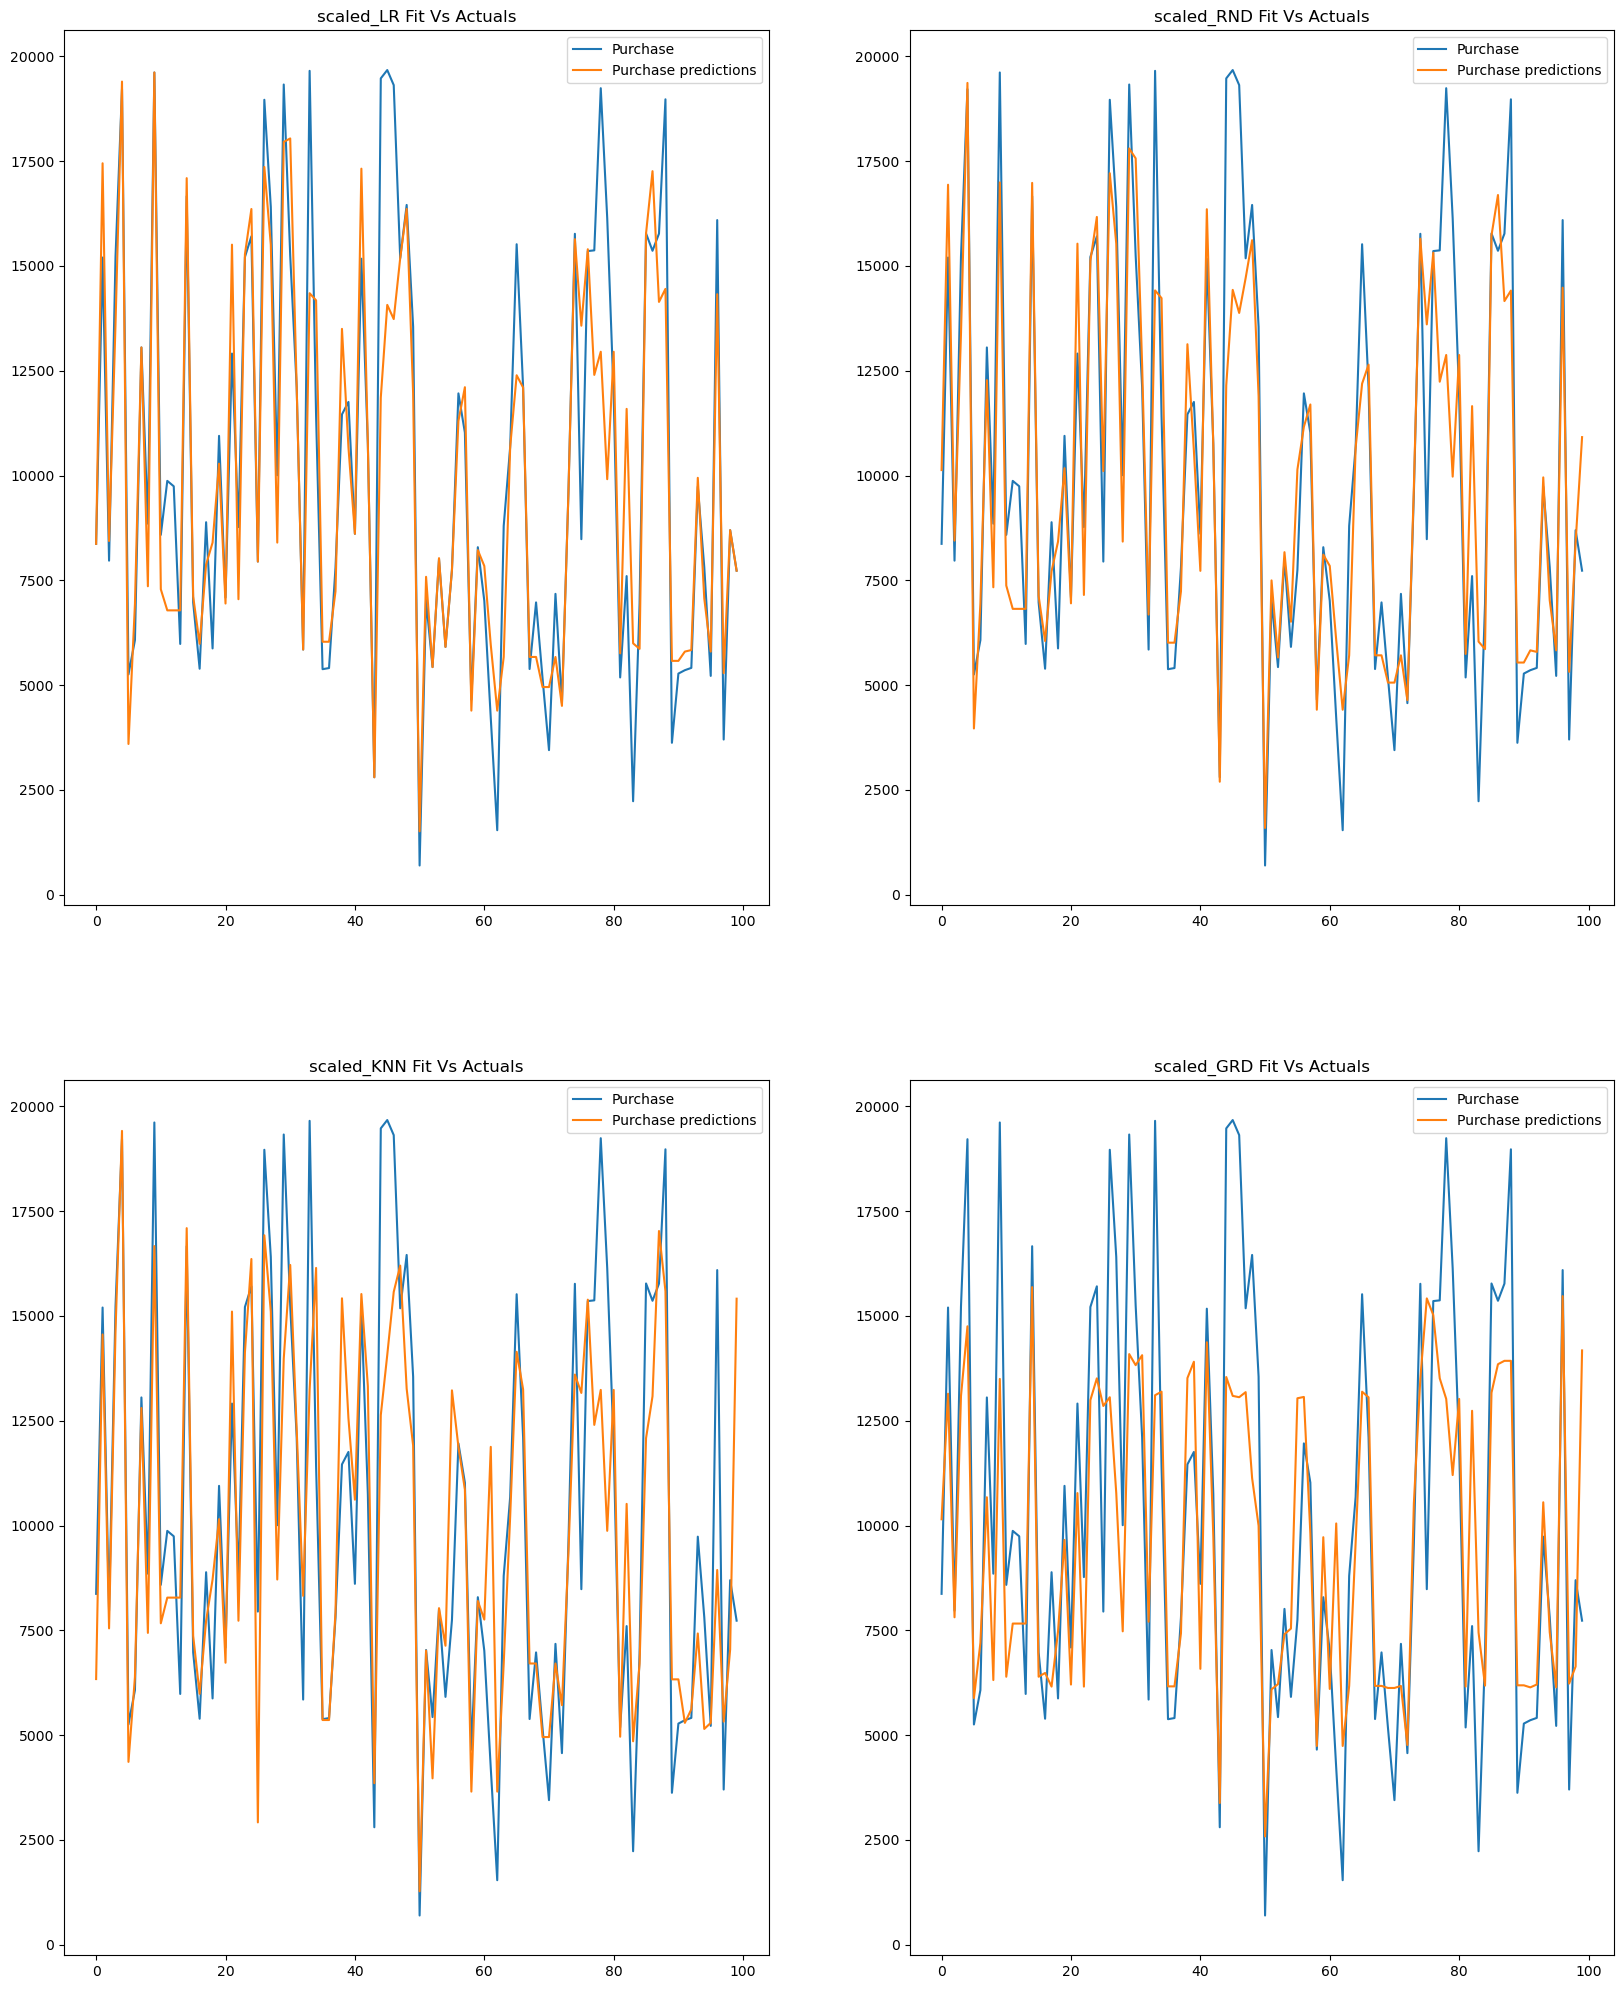

In [67]:
plot_fit_acts(scaled_predicts,actuals = y_train.copy())

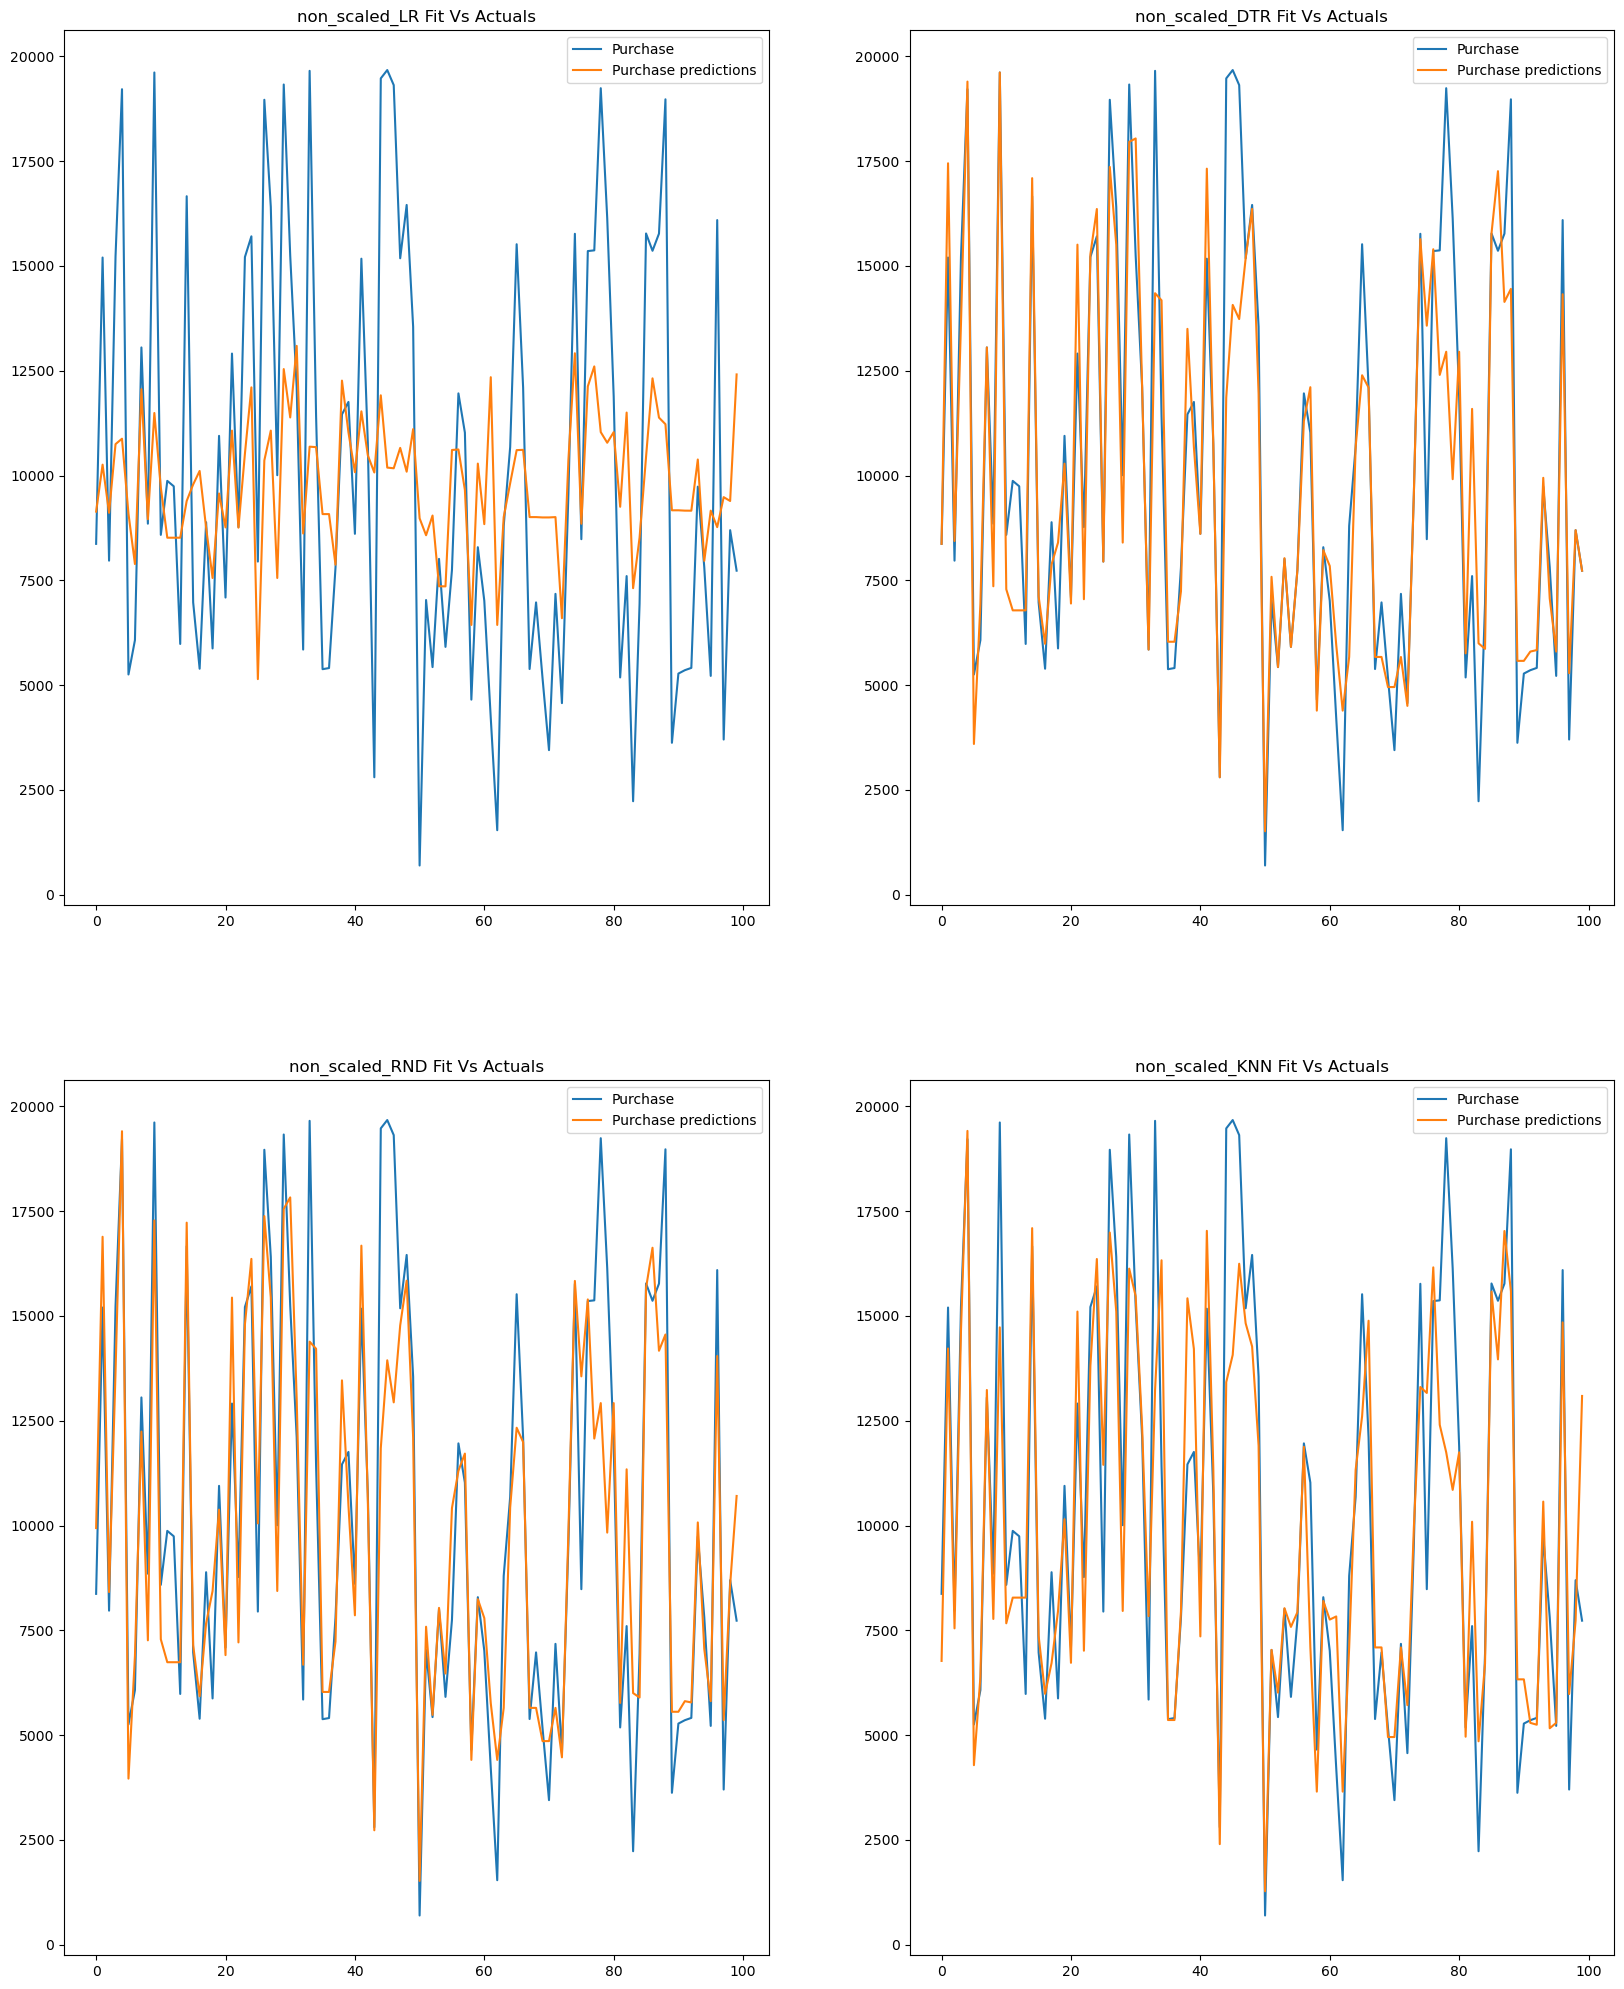

In [68]:
plot_fit_acts(non_scaled_predicts,actuals = y_train.copy())

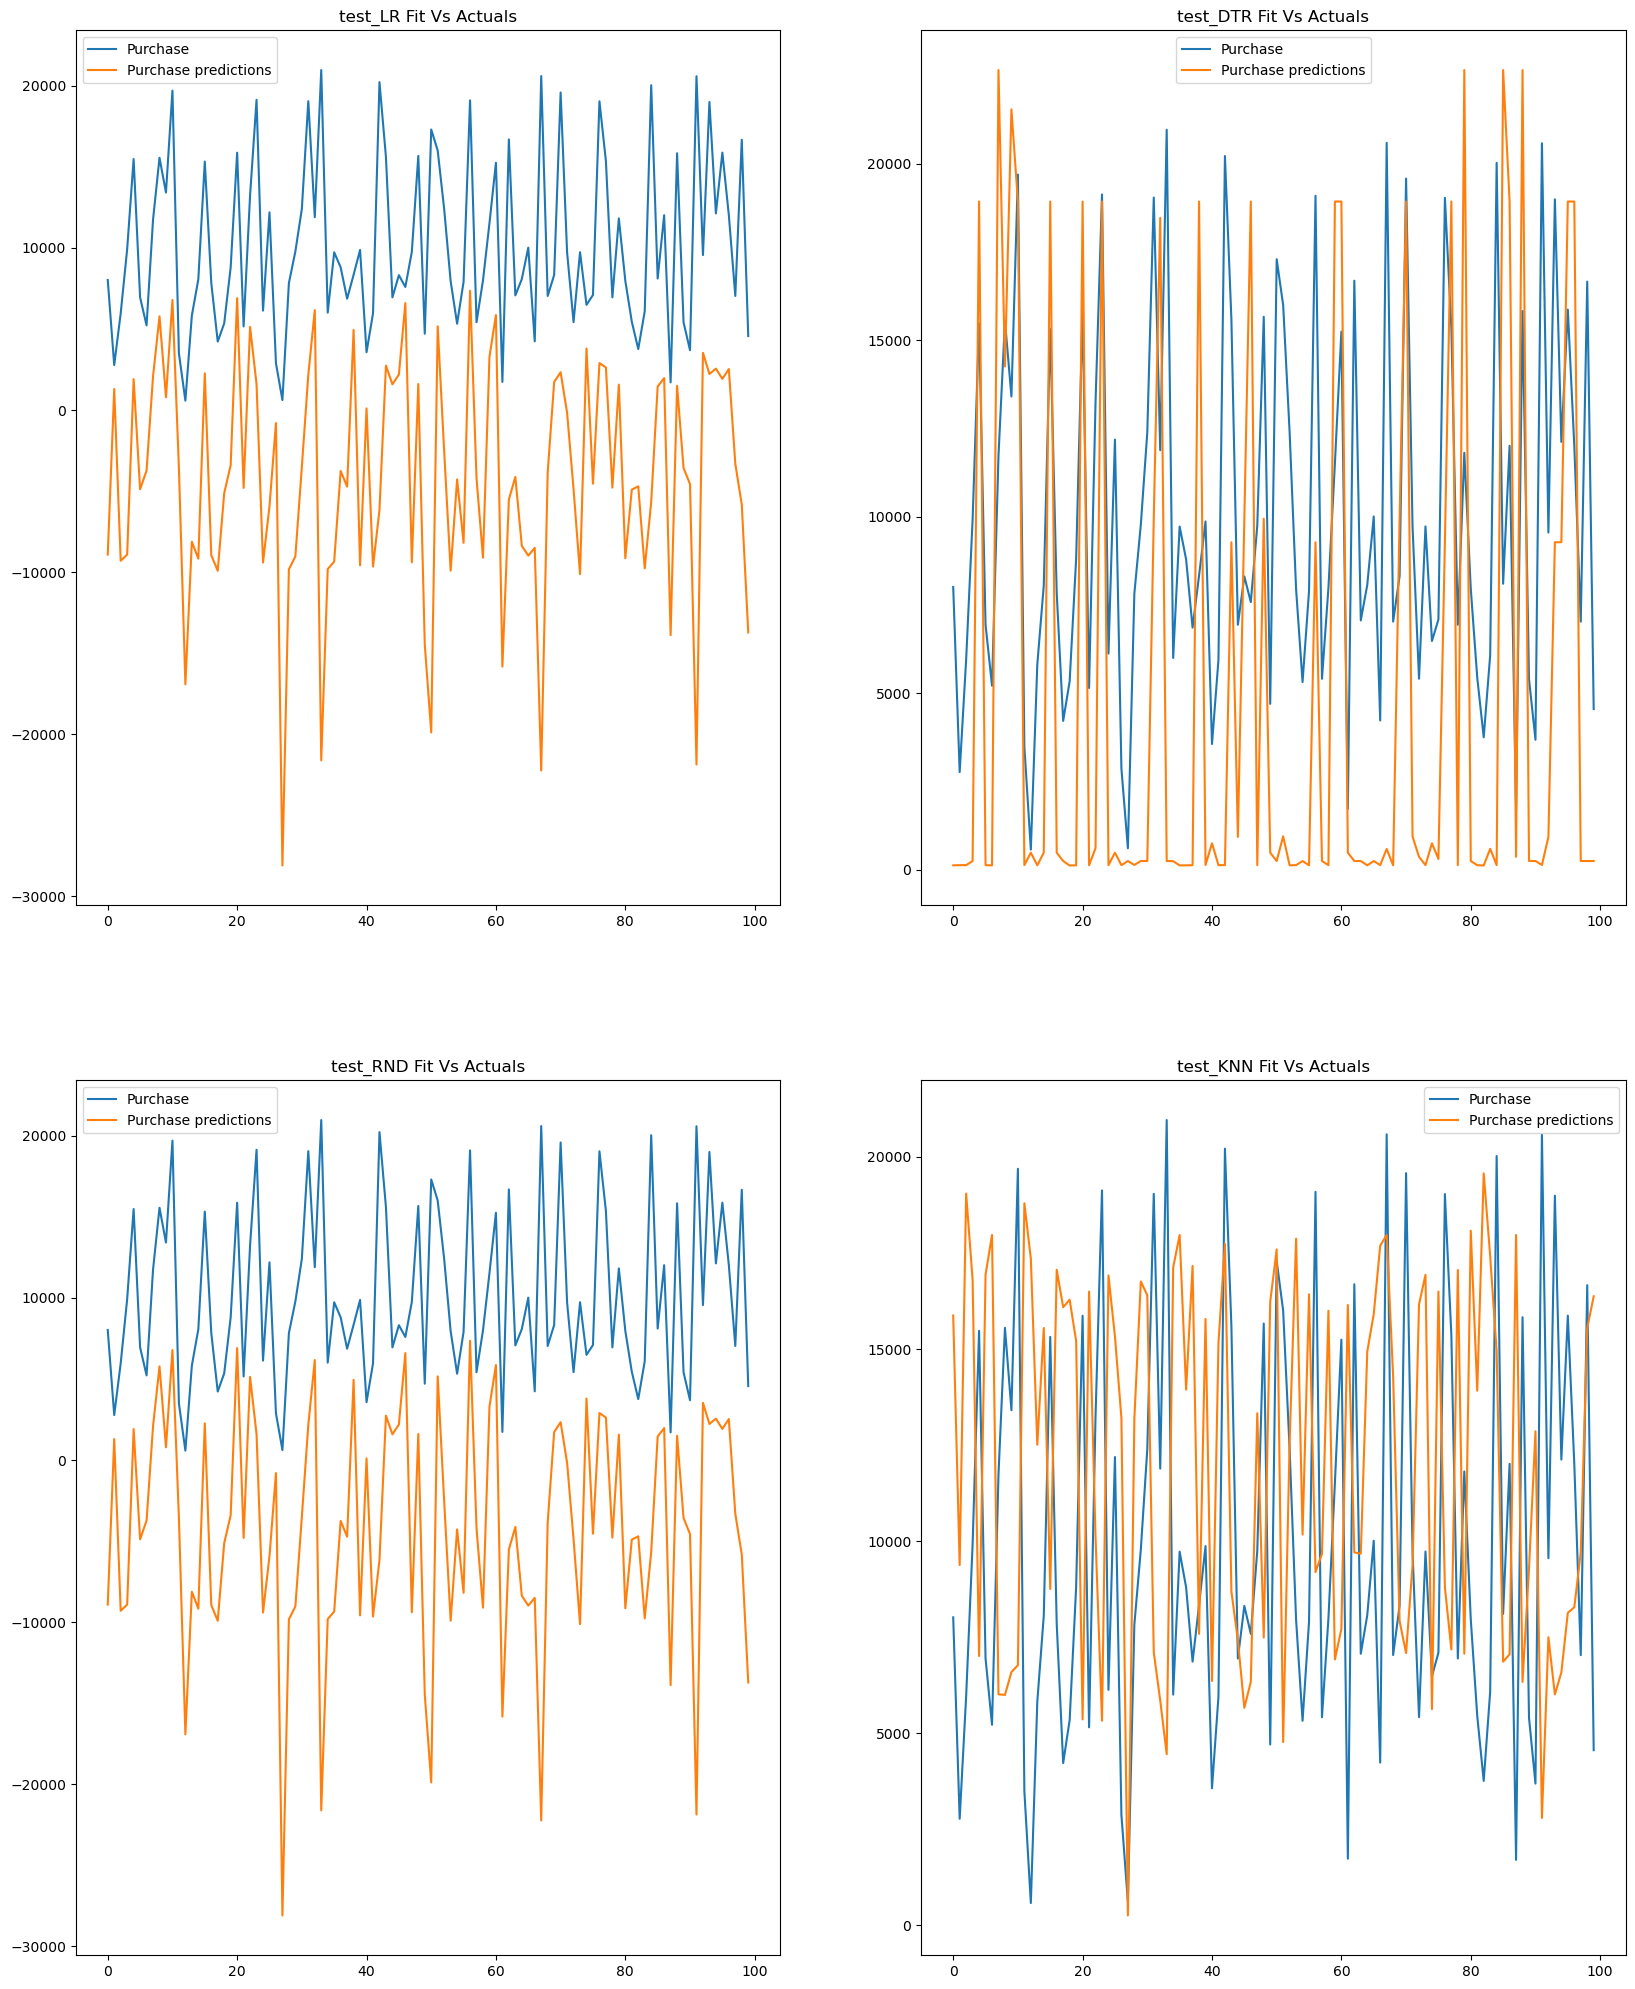

In [69]:
plot_fit_acts(test_predicts,actuals = y_actual.copy())